### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
import time
from sklearn.metrics import plot_confusion_matrix,roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import itertools as it
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from itertools import cycle
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import optuna
from sklearn.tree import DecisionTreeClassifier
import optuna.visualization as vis
from sklearn.model_selection import cross_val_score
%matplotlib inline

### Importing the dataset

In [2]:
# Loading the dataset to a variable 'data'
data=pd.read_csv('/Users/bollipallipreethichowdary/Downloads/bank-additional-full_final.csv')

### Display first five rows of the dataset

In [3]:
# Printing the first five records of data using head() function
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Display Last five rows from the dataset

In [4]:
# Printing the last five records of data using tail() function
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
# features of the dataset
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### EDA - Exploratory Data Analysis

In [6]:
#returning rows along with features and target in the dataframe
print(f'shape of our dataset is {data.shape}')
print(f'There are {data.shape[0]} examples and {data.shape[1]-1} features with one target variable')

shape of our dataset is (41188, 21)
There are 41188 examples and 20 features with one target variable


### Providing the statistical description of the dataset

In [7]:
#returning the summary such as count, mean, std etc of numerical data in the dataframe
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- From the above output:
    - The respondents' ages range from 17 to 98, with a mean age of 40.
    - During the present marketing campaign, there were between 1 and 56 contacts, with a mean of roughly 2.5.
    - The majority of respondents (75%) were not previously contacted in the previous campaign and the maximum value of pdays   (days since last contact) is 999, which indicates that they were not contacted

In [8]:
#returns number of columns , column names , datatype ,rangeindex,non-null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### **Univariate Analysis**

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

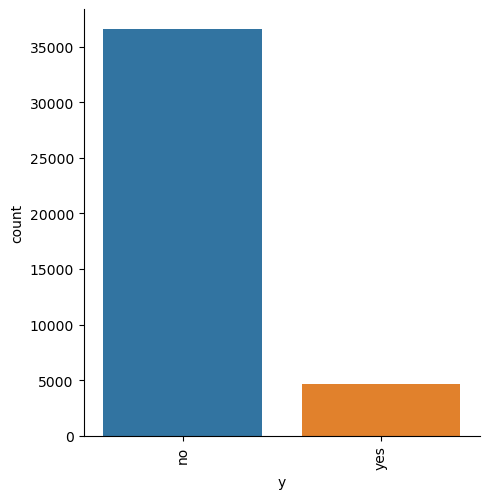

In [9]:
#target variable
plt.style.use('default')
sns.catplot(x='y',data=data,kind='count')
plt.xticks(rotation=90)

- From the above bar graph we can infer that the dataset is imbalanced.There are more number of 'no' category.

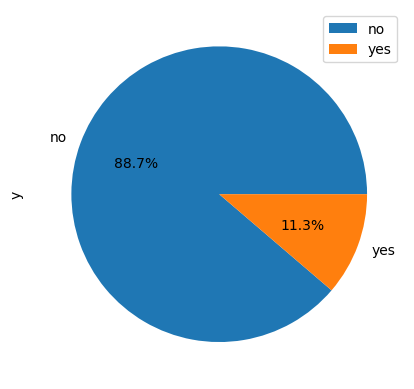

<Figure size 640x480 with 0 Axes>

In [10]:
#target variable percentage using pie chart
plt.style.use('default')
pie_MS_M=pd.DataFrame(data['y'].value_counts())
pie_MS_M.plot.pie(subplots=True,labels=pie_MS_M.index.values,autopct='%1.1f%%')
plt.show()
plt.savefig("pie_chart.jpg")

- From the above pie chart, we infer that there is 88.7% of 'NO' catergory customers and 11.3% of 'Yes' category customers.

### **Bivariate Analysis**

**1.What is the effect of contact frequency and duration on the success of marketing campaigns?**

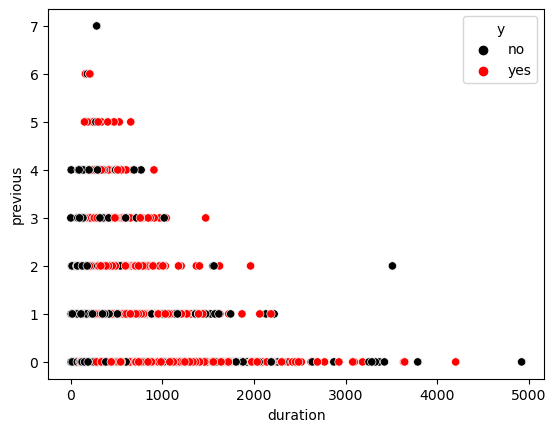

In [11]:
plt.style.use('default')
hue_color={'no':'black','yes':'red'}
sns.scatterplot(x='duration',y='previous',hue='y',data=data,palette=hue_color)
plt.show()

- From above graph, there is no significant inference as both the categories are almost evenly distributed all over the graph.

**2.How does the success of marketing campaigns vary across different job groups and education levels?**

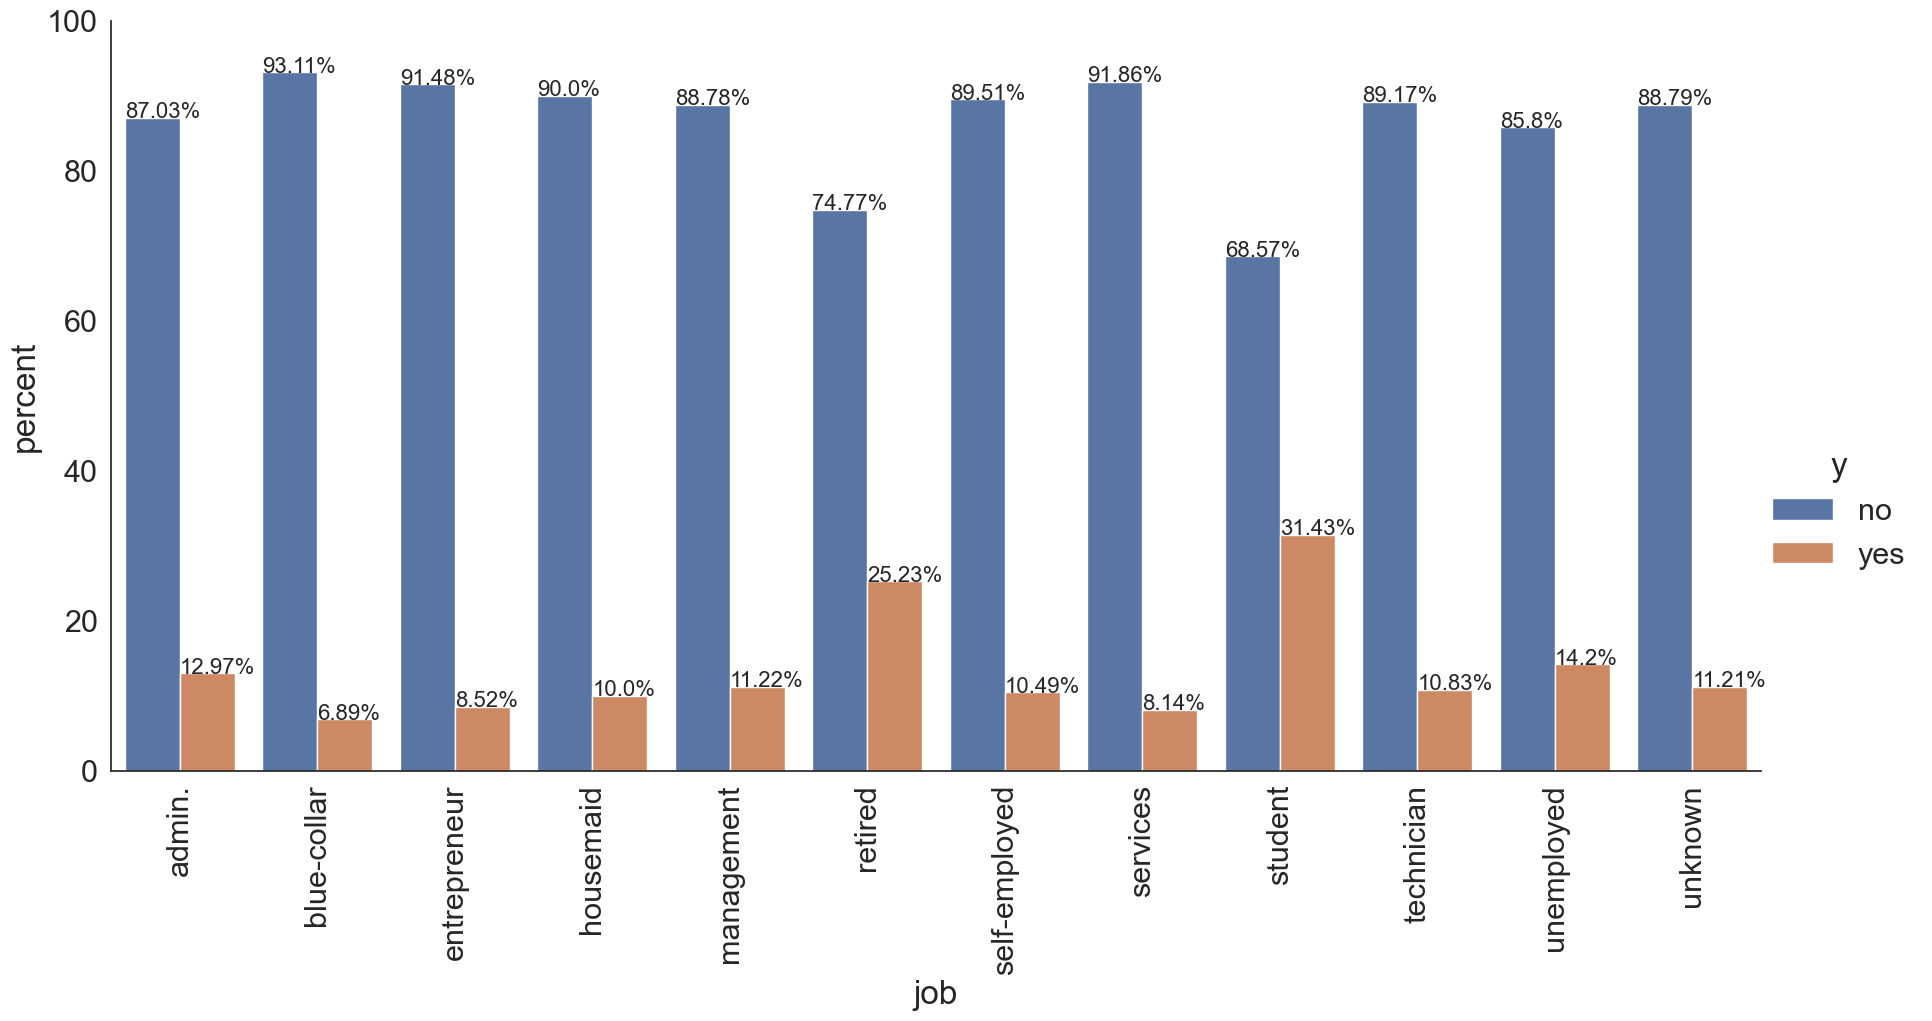

In [12]:
x,y = 'job', 'y'
sns.set_theme(style = "white", font_scale= 2)
df1_per = data.groupby(x)[y].value_counts(normalize=True)
df1_per = df1_per.mul(100)
df1_per = df1_per.rename('percent').reset_index()
plot_job = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1_per,height=9,aspect=2)
plot_job.ax.set_ylim(0,100)
for e in plot_job.ax.patches:
    dis_per = str(e.get_height().round(2)) + '%'
    dis_per_x = e.get_x() 
    dis_per_y = e.get_height()
    plot_job.ax.text(dis_per_x,dis_per_y,dis_per,fontsize=16)
    plt.xticks(rotation=90)

- Above graph represents that 'student' are most likely to subscribe to a term deposit followed by 'retired' people.
- 'Blue collar' profession customers are least likely to subscribe to a term deposit.

**education versus target**

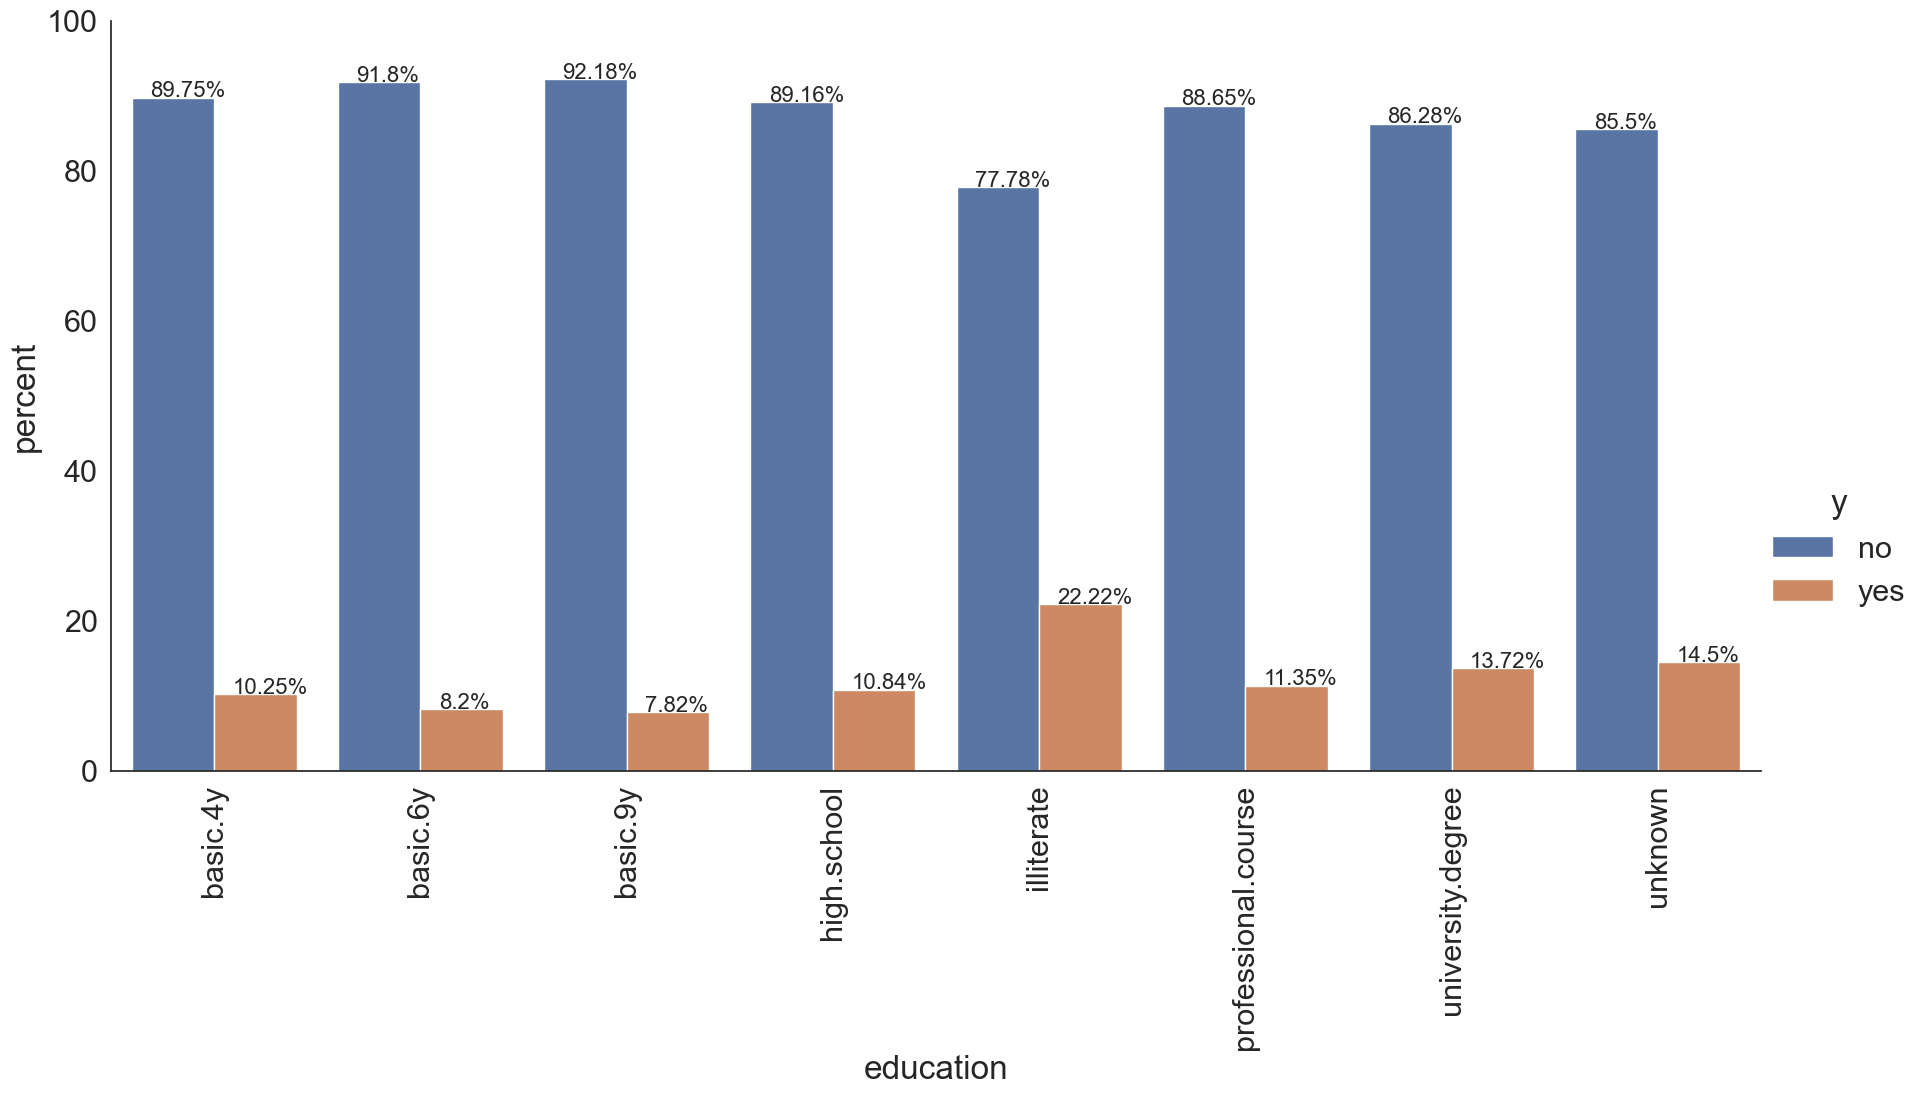

In [13]:
x,y = 'education', 'y'
sns.set_theme(style = "white", font_scale= 2)
df1_edu = data.groupby(x)[y].value_counts(normalize=True)
df1_edu = df1_edu.mul(100)
df1_edu = df1_edu.rename('percent').reset_index()
plot_edu = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1_edu,height=9,aspect=2)
plot_edu.ax.set_ylim(0,100)
for j in plot_edu.ax.patches:
    dis_edu = str(j.get_height().round(2)) + '%'
    dis_edu_x = j.get_x() 
    dis_edu_y = j.get_height()
    plot_edu.ax.text(dis_edu_x+0.09,dis_edu_y+0.1,dis_edu,fontsize=16)
    plt.xticks(rotation=90)

- From above graph, 'illterate' are most likely to subscribe to a term deposit followed by 'unknown'.
- basic 9 years of education customers are least likely to take up a term deposit.

**3.Are there differences in the success rates of marketing campaigns conducted during different times of the year or in different seasons?**

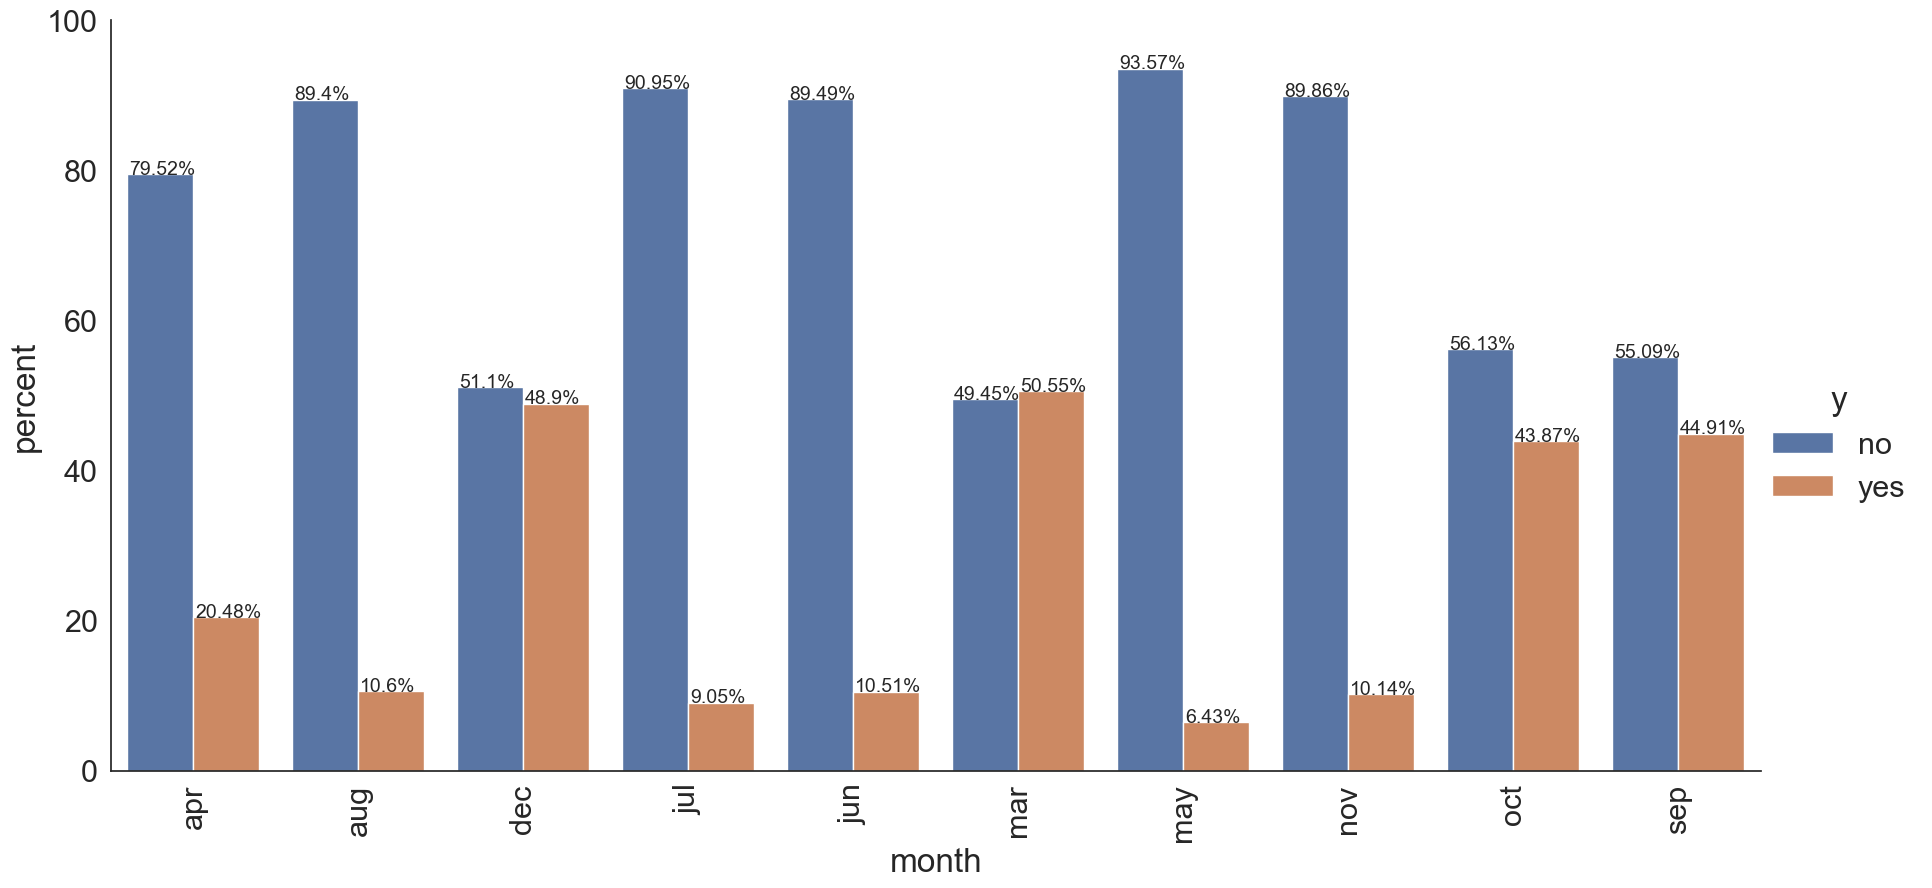

In [14]:
x,y = 'month', 'y'
sns.set_theme(style = "white", font_scale= 2)
df1_mnth = data.groupby(x)[y].value_counts(normalize=True)
df1_mnth = df1_mnth.mul(100)
df1_mnth = df1_mnth.rename('percent').reset_index()
plot_mnth = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1_mnth,height=9,aspect=2)
plot_mnth.ax.set_ylim(0,100)
for i in plot_mnth.ax.patches:
    dis_mnth = str(i.get_height().round(2)) + '%'
    dis_mnth_x = i.get_x() 
    dis_mnth_y = i.get_height()
    plot_mnth.ax.text(dis_mnth_x+0.01,dis_mnth_y+0.01,dis_mnth,fontsize=14)
    plt.xticks(rotation=90)

- In the month of March there are highest percentage of customers taking up term deposit and it is observed that 'yes' percentage is outperforming the 'no' percentage.
- Also, December and september months too have a fair amount of customers subscribing to a term deposit.
- It is observed that may,june,july and august are the months where customers are less likely to choose a term deposit.

**4.Are there differences in the success rates of marketing campaigns vary across martial status?**

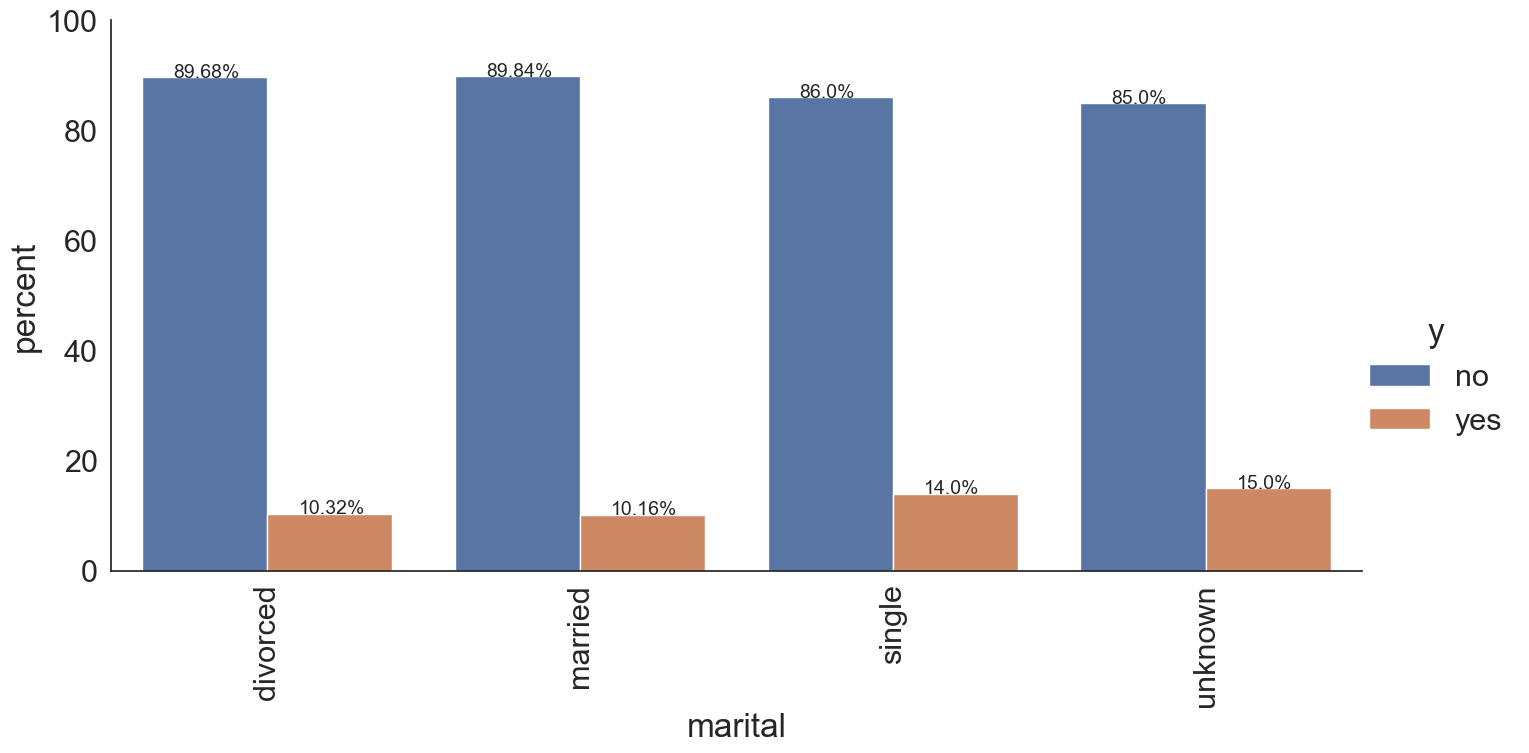

In [15]:
x,y = 'marital', 'y'
sns.set_theme(style = "white", font_scale= 2)
df1_marital = data.groupby(x)[y].value_counts(normalize=True)
df1_marital = df1_marital.mul(100)
df1_marital = df1_marital.rename('percent').reset_index()
plot_marital = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1_marital,height=7,aspect=2)
plot_marital.ax.set_ylim(0,100)
for c in plot_marital.ax.patches:
    dis_marital = str(c.get_height().round(2)) + '%'
    dis_marital_x = c.get_x() 
    dis_marital_y = c.get_height()
    plot_marital.ax.text(dis_marital_x+0.1,dis_marital_y,dis_marital,fontsize=14)
    plt.xticks(rotation=90)

- The 'unknown' and 'single' category people are more likey into term deposit and on the other hand 'married' and 'divorced' are almost equally less interested in term deposit compare to the aforementioned.

### Data Preprocessing

In [16]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

- From the above output we can observe that there are no null values present in the dataset.

In [17]:
#find if there are any duplicate values
data.duplicated().sum()

12

- From the above output we can say that there are 12 duplicate records.

In [18]:
data.drop_duplicates(inplace=True)

- In the above code we have removed the duplicate records.

In [19]:
data.shape

(41176, 21)

- There are 41176 records/rows and 21 columns/features in our dataset after removing the 12 duplicate records.

### Label Encoding

In [20]:
label_encode = preprocessing.LabelEncoder()

In [21]:
#Converting the categorical values into numerical data
features=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
for f in features:
    data[f]=label_encode.fit_transform(data[f])

- The main purpose of label encoding is to convert the categorical values into numerical values in our dataset because machines  understand only numbers.

In [22]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [23]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,5,1,5,0,2,0,0,7,0,...,3,999,1,0,-1.1,94.767,-50.8,1.028,4963.6,0


### Correlation of success marketing campaigns with features

<AxesSubplot:>

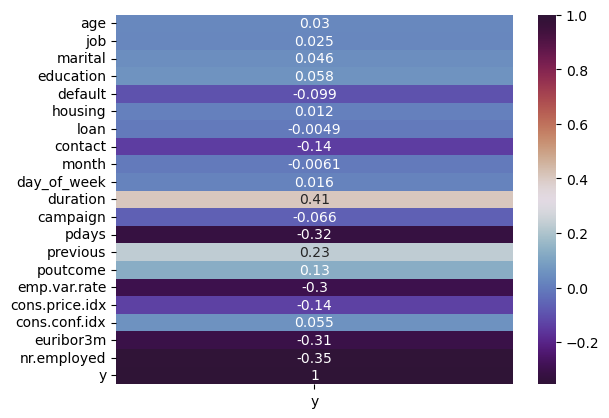

In [24]:
plt.style.use('default')
corr = data.corr()[['y']]
sns.heatmap(corr, cmap='twilight_shifted',annot=True)

- Correlation is used to find the strength of relationship between independent variable and dependent variable.
- In the above output, we infer that 'duration' is positively correlated to output variable 'y' which is 0.41.
- 'Loan' and 'month' are least correlated to the output variable as they are very close to zero.
- 'pdays' are highly negatively correlated followed by 'emp.var.rate' and 'contact'.

### Splitting the dataset into independent variables and dependent variables

In [25]:
Features=data.iloc[:,0:20]
Feature=data.iloc[:,0:20]
Label=data[['y']]

### Normalization using MinMaxscalar


In [26]:
# Normalizing the features helps to stablize the model and the range of minmaxscalar() is between 0 to 1.
sca = preprocessing.MinMaxScaler()

In [27]:
sca.fit(Features)
Features=sca.transform(Features)

- The MinMaxScalar( ) is used to normalize the data between the range of 0 to 1.
- This aids for the better performance of the model and also reduces the computational time of the model.

In [28]:
# printing features after normalization
Features

array([[0.48148148, 0.27272727, 0.33333333, ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.63636364, 0.33333333, ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.63636364, 0.33333333, ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.45454545, 0.33333333, ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.81818182, 0.33333333, ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.45454545, 0.33333333, ..., 0.        , 0.08932215,
        0.        ]])

In [29]:
# Display the number of rows and columns of independent variables in the dataset 
print("There are totally " + str(Features.shape) + " rows and columns respectively")

There are totally (41176, 20) rows and columns respectively


In [30]:
# Display the shape of dependent variable of the dataset 
print("There are totally " + str(Label.shape) + " rows and column respectively")

There are totally (41176, 1) rows and column respectively


In [31]:
Label.head()

,y
0,0
1,0
2,0
3,0
4,0


### Feature selection using the Chi-square test

In [32]:
chi2_val, p_val = chi2(Features, Label)

In [33]:
print(chi2_val)

[2.21286316e+00 8.27824414e+00 9.28149256e+00 2.39209338e+01
 1.60945551e+02 2.51500769e+00 7.97408142e-01 5.47778461e+02
 2.13089623e-01 2.55840686e+00 3.57984549e+02 1.61376148e+01
 1.58015941e+02 4.41387744e+02 4.91316649e+01 5.40921063e+02
 7.24788534e+01 1.07614194e+01 8.90235155e+02 5.02482724e+02]


In [34]:
print(p_val)

[1.36864449e-001 4.01229100e-003 2.31480733e-003 1.00374338e-006
 7.03170414e-037 1.12767083e-001 3.71869424e-001 3.83060036e-121
 6.44356492e-001 1.09709090e-001 7.73474400e-080 5.89024783e-005
 3.07013724e-036 5.40033413e-098 2.39345143e-012 1.18865943e-119
 1.68831386e-017 1.03637872e-003 1.30194787e-195 2.74019987e-111]


In [35]:
# Displaying the p-values along with their corresponding features for better understanding
for i_1,c_1 in zip(p_val,Feature.columns):
    print(f'{c_1} & {i_1:.5f} ')

age & 0.13686 
job & 0.00401 
marital & 0.00231 
education & 0.00000 
default & 0.00000 
housing & 0.11277 
loan & 0.37187 
contact & 0.00000 
month & 0.64436 
day_of_week & 0.10971 
duration & 0.00000 
campaign & 0.00006 
pdays & 0.00000 
previous & 0.00000 
poutcome & 0.00000 
emp.var.rate & 0.00000 
cons.price.idx & 0.00000 
cons.conf.idx & 0.00104 
euribor3m & 0.00000 
nr.employed & 0.00000 


- From the above values, features p_value for "**month**", "**age**", "**day_of_week**" and "**loan**" is greater than 0.05 which means they are insignificant, so we will remove these features as shown below.

In [36]:
# deleting the features that are not significant
Features=np.delete(Features, [0,6,8,9], 1)

In [37]:
Features.shape

(41176, 16)

- The features count is now reduced to 16 due to deletion of four insignificant features.

### Split the dataset into train and test data

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(Features,Label,test_size=0.20,random_state=12)

- The dataset is split into 80% train data and 20% test data. Below are the exact count of each subset.

In [39]:
print(f'Shape of X_train {X_train.shape}, Y_train {Y_train.shape}, X_test {X_test.shape} and Y_test {Y_test.shape}')

Shape of X_train (32940, 16), Y_train (32940, 1), X_test (8236, 16) and Y_test (8236, 1)


In [40]:
# convert the multidimensional array into flattened array using ravel().
Y_train = Y_train.values.ravel()
Y_test = Y_test.values.ravel()

## Model Training

### Bagging Classifier


In [41]:
# providing the possible hyperparameters for bagging classifier
from sklearn.metrics import accuracy_score
def Objective(trial):
    n_estimate = trial.suggest_int('n_estimators', 10, 100)
    max_sample = trial.suggest_float('max_samples', 0.1, 1)
    max_feature = trial.suggest_float('max_features',0.1, 1.0)
    
    bagg_model = BaggingClassifier(base_estimator=BaggingClassifier(max_samples=max_sample, max_features=max_feature),n_estimators=n_estimate,random_state=42 )
    bagg_model.fit(X_train, Y_train)
    bagg_pred = bagg_model.predict(X_test)
    pred_labels = np.rint(bagg_pred)
    bagg_acc = accuracy_score(Y_test,pred_labels)
    return bagg_acc

### Hyperparameter tuning using Optuna with 100 trails

In [42]:
optuna_learn = optuna.create_study(direction='maximize')
optuna_learn.optimize(Objective, n_trials=100)

[I 2023-04-22 13:36:13,321] A new study created in memory with name: no-name-555c93c6-176b-4531-adc4-9e789e9933a0
[I 2023-04-22 13:36:21,957] Trial 0 finished with value: 0.9123360854783875 and parameters: {'n_estimators': 52, 'max_samples': 0.7502957602707149, 'max_features': 0.5099926678282148}. Best is trial 0 with value: 0.9123360854783875.
[I 2023-04-22 13:36:23,902] Trial 1 finished with value: 0.8912093249150073 and parameters: {'n_estimators': 52, 'max_samples': 0.32937395062678626, 'max_features': 0.1439134090611357}. Best is trial 0 with value: 0.9123360854783875.
[I 2023-04-22 13:36:28,852] Trial 2 finished with value: 0.9139145216124333 and parameters: {'n_estimators': 29, 'max_samples': 0.6716254608899912, 'max_features': 0.5925054344436974}. Best is trial 2 with value: 0.9139145216124333.
[I 2023-04-22 13:36:33,290] Trial 3 finished with value: 0.9182855755220981 and parameters: {'n_estimators': 27, 'max_samples': 0.4297771048651591, 'max_features': 0.7988844495532206}. B

### Bagging - Optuna performance plot

In [100]:
vis.plot_optimization_history(optuna_learn)

### Returning  the Best Parameters for bagging

In [44]:
print(f'best trial: {optuna_learn.best_trial.number}, best_parameters: {optuna_learn.best_params}, best_value: {optuna_learn.best_value}')

best trial: 10, best_parameters: {'n_estimators': 10, 'max_samples': 0.57041228830282, 'max_features': 0.9997678208656238}, best_value: 0.921321029626032


### AdaBoost Classifier

In [45]:
# providing the possible hyperparameters for Adaboost classifier
def Objective(trial):
    n_estimate = trial.suggest_int('n_estimators', 10, 100)
    learn_rate = trial.suggest_float('learning_rate', 0.01, 1)
    ada_model = AdaBoostClassifier(n_estimators=n_estimate,learning_rate=learn_rate, random_state=0)
    ada_model.fit(X_train, Y_train)
    ada_pred = ada_model.predict(X_test)
    pred_labels = np.rint(ada_pred)
    ada_acc = accuracy_score(Y_test, pred_labels)
    return ada_acc

### Hyperparameter tuning using Optuna with 100 trails

In [46]:
optuna_learn = optuna.create_study(direction='maximize')
optuna_learn.optimize(Objective, n_trials=100)

[I 2023-04-22 13:53:28,762] A new study created in memory with name: no-name-67e3de3a-459c-4e63-8ce4-e48f54b6601b
[I 2023-04-22 13:53:29,341] Trial 0 finished with value: 0.9005585235551239 and parameters: {'n_estimators': 43, 'learning_rate': 0.11385241387968072}. Best is trial 0 with value: 0.9005585235551239.
[I 2023-04-22 13:53:30,539] Trial 1 finished with value: 0.9097863040310831 and parameters: {'n_estimators': 94, 'learning_rate': 0.735819511785518}. Best is trial 1 with value: 0.9097863040310831.
[I 2023-04-22 13:53:31,048] Trial 2 finished with value: 0.9097863040310831 and parameters: {'n_estimators': 40, 'learning_rate': 0.6750320691292874}. Best is trial 1 with value: 0.9097863040310831.
[I 2023-04-22 13:53:31,807] Trial 3 finished with value: 0.9110004856726567 and parameters: {'n_estimators': 56, 'learning_rate': 0.9705112753521619}. Best is trial 3 with value: 0.9110004856726567.
[I 2023-04-22 13:53:32,090] Trial 4 finished with value: 0.9096648858669257 and parameters

### AdaBoost - Optuna performance plot

In [47]:
vis.plot_optimization_history(optuna_learn)

### Returning  the Best Parameters for AdaBoost classifier

In [48]:
print(f'best trial: {optuna_learn.best_trial.number}, best_parameters: {optuna_learn.best_params}, best_value: {optuna_learn.best_value}')

best trial: 85, best_parameters: {'n_estimators': 70, 'learning_rate': 0.9726801594887987}, best_value: 0.911121903836814


### Gradient Boosting Classifier

In [49]:
# providing the possible hyperparameters for Gradient boosting classifier
def Objective(trial):
    n_estimate = trial.suggest_int('n_estimators', 10, 100)
    learn_rate = trial.suggest_float('learning_rate', 0.01, 1)
    min_sample_split=trial.suggest_int('min_samples_split',2,10)
    min_sample_leaf=trial.suggest_int('min_samples_leaf',1,6)
    
    gb_model = GradientBoostingClassifier(n_estimators=n_estimate,learning_rate=learn_rate,min_samples_split=min_sample_split
                             ,min_samples_leaf=min_sample_leaf,random_state=0)
    gb_model.fit(X_train,Y_train)
    gb_pred = gb_model.predict(X_test)
    pred_labels = np.rint(gb_pred)
    gb_acc = accuracy_score(Y_test, pred_labels)
    return gb_acc

### Hyperparameter tuning using Optuna with 100 trails

In [50]:
optuna_learn = optuna.create_study(direction='maximize')
optuna_learn.optimize(Objective, n_trials=100)

[I 2023-04-22 13:54:49,986] A new study created in memory with name: no-name-431d442b-d124-4d0d-8633-52ff67949fcc
[I 2023-04-22 13:54:50,268] Trial 0 finished with value: 0.9078436134045653 and parameters: {'n_estimators': 11, 'learning_rate': 0.12130391091708861, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9078436134045653.
[I 2023-04-22 13:54:51,675] Trial 1 finished with value: 0.9174356483729966 and parameters: {'n_estimators': 58, 'learning_rate': 0.05944287262093964, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9174356483729966.
[I 2023-04-22 13:54:52,042] Trial 2 finished with value: 0.9146430305973774 and parameters: {'n_estimators': 15, 'learning_rate': 0.1273843505482071, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9174356483729966.
[I 2023-04-22 13:54:53,805] Trial 3 finished with value: 0.9059009227780476 and parameters: {'n_estimators': 73, 'learning_rate': 0.01638971123811

###  Gradient boosting - Optuna performance plot

In [51]:
vis.plot_optimization_history(optuna_learn)

### Returning  the Best Parameters for Gradient Boosting classifier

In [52]:
print(f'best trial: {optuna_learn.best_trial.number}, best_parameters: {optuna_learn.best_params}, best_value: {optuna_learn.best_value}')

best trial: 58, best_parameters: {'n_estimators': 54, 'learning_rate': 0.3519588592603045, 'min_samples_split': 9, 'min_samples_leaf': 5}, best_value: 0.9211996114618747


### Random Forest Classifier

In [53]:
# providing the possible hyperparameters for Random forest classifier
def Objective(trial):
    n_estimate = trial.suggest_int('n_estimators', 10, 100)
    maximum_depth = trial.suggest_int('max_depth', 2, 20)
    
    rf_model = RandomForestClassifier(n_estimators=n_estimate,max_depth=maximum_depth)
    rf_model.fit(X_train, Y_train)
    rf_pred = rf_model.predict(X_test)
    pred_labels = np.rint(rf_pred)
    rf_acc = accuracy_score(Y_test, pred_labels)
    return rf_acc

### Hyperparameter tuning using Optuna with 100 trails

In [54]:
optuna_learn = optuna.create_study(direction='maximize')
optuna_learn.optimize(Objective, n_trials=100)

[I 2023-04-22 13:57:00,048] A new study created in memory with name: no-name-4f6a6ef4-bb4c-4164-a0f1-cb2bdb412073
[I 2023-04-22 13:57:00,783] Trial 0 finished with value: 0.9180427391937834 and parameters: {'n_estimators': 56, 'max_depth': 8}. Best is trial 0 with value: 0.9180427391937834.
[I 2023-04-22 13:57:01,326] Trial 1 finished with value: 0.9147644487615347 and parameters: {'n_estimators': 29, 'max_depth': 16}. Best is trial 0 with value: 0.9180427391937834.
[I 2023-04-22 13:57:03,077] Trial 2 finished with value: 0.9152501214181642 and parameters: {'n_estimators': 91, 'max_depth': 17}. Best is trial 0 with value: 0.9180427391937834.
[I 2023-04-22 13:57:04,278] Trial 3 finished with value: 0.9171928120446818 and parameters: {'n_estimators': 63, 'max_depth': 17}. Best is trial 0 with value: 0.9180427391937834.
[I 2023-04-22 13:57:05,380] Trial 4 finished with value: 0.9198640116561437 and parameters: {'n_estimators': 65, 'max_depth': 12}. Best is trial 4 with value: 0.9198640116

###  Random Forest - Optuna performance plot

In [55]:
vis.plot_optimization_history(optuna_learn)

### Returning the Best Parameters for random forest classifier

In [56]:
print(f'best trial: {optuna_learn.best_trial.number}, best_parameters: {optuna_learn.best_params}, best_value: {optuna_learn.best_value}')

best trial: 61, best_parameters: {'n_estimators': 97, 'max_depth': 12}, best_value: 0.9224137931034483


### Logistic Regression 


In [57]:
# providing the possible hyperparameters for logistic regression
def Objective(trial):
    penality = trial.suggest_categorical('penalty', ['none', 'l2'])
    maximum_iter = trial.suggest_int('max_iter', 100, 200)
    
    log_model = LogisticRegression(max_iter=maximum_iter,penalty=penality)
    log_model.fit(X_train, Y_train)
    log_pred = log_model.predict(X_test)
    pred_labels = np.rint(log_pred)
    log_acc = accuracy_score(Y_test, pred_labels)
    return log_acc

### Hyperparameter tuning using Optuna with 100 trails

In [58]:
optuna_learn = optuna.create_study(direction='maximize')
optuna_learn.optimize(Objective, n_trials=100)

[I 2023-04-22 13:59:09,272] A new study created in memory with name: no-name-fb30562b-1ab6-4168-b59e-868832159009
[I 2023-04-22 13:59:09,416] Trial 0 finished with value: 0.9116075764934434 and parameters: {'penalty': 'l2', 'max_iter': 113}. Best is trial 0 with value: 0.9116075764934434.
[I 2023-04-22 13:59:09,526] Trial 1 finished with value: 0.9118504128217582 and parameters: {'penalty': 'none', 'max_iter': 152}. Best is trial 1 with value: 0.9118504128217582.
[I 2023-04-22 13:59:09,622] Trial 2 finished with value: 0.9116075764934434 and parameters: {'penalty': 'l2', 'max_iter': 138}. Best is trial 1 with value: 0.9118504128217582.
[I 2023-04-22 13:59:09,724] Trial 3 finished with value: 0.9118504128217582 and parameters: {'penalty': 'none', 'max_iter': 123}. Best is trial 1 with value: 0.9118504128217582.
[I 2023-04-22 13:59:09,822] Trial 4 finished with value: 0.9116075764934434 and parameters: {'penalty': 'l2', 'max_iter': 185}. Best is trial 1 with value: 0.9118504128217582.
[I

###  Logistic regression - Optuna performance plot

In [59]:
vis.plot_optimization_history(optuna_learn)

### Returning the Best Parameters for logistic regression

In [60]:
print(f'best trial: {optuna_learn.best_trial.number}, best parameters: {optuna_learn.best_params}, best_value: {optuna_learn.best_value}')

best trial: 1, best parameters: {'penalty': 'none', 'max_iter': 152}, best_value: 0.9118504128217582


In [61]:
# providing the possible hyperparameters for Decision tree classifier
def Objective(trial):
    criteria = trial.suggest_categorical("criterion", ["gini", "entropy"])
    maximum_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    min_sample_split = trial.suggest_int("min_samples_split", 2, 10)
    min_sample_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    dt_model = DecisionTreeClassifier(criterion=criteria, max_depth=maximum_depth, min_samples_split=min_sample_split,
                                 min_samples_leaf=min_sample_leaf)
    dt_model.fit(X_train, Y_train)
    dt_pred = dt_model.predict(X_test)
    pred_labels = np.rint(dt_pred)
    dt_acc = accuracy_score(Y_test, pred_labels)
    return dt_acc

### Hyperparameter tuning using Optuna with 100 trails

In [62]:
optuna_learn = optuna.create_study(direction='maximize')
optuna_learn.optimize(Objective, n_trials=100)

[I 2023-04-22 13:59:20,038] A new study created in memory with name: no-name-b70c5247-62c7-43a5-9a4d-9852977c9583
[I 2023-04-22 13:59:20,085] Trial 0 finished with value: 0.9144001942690626 and parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9144001942690626.
[I 2023-04-22 13:59:20,114] Trial 1 finished with value: 0.9068722680913065 and parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9144001942690626.
[I 2023-04-22 13:59:20,156] Trial 2 finished with value: 0.9169499757163672 and parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.9169499757163672.
[I 2023-04-22 13:59:20,175] Trial 3 finished with value: 0.9068722680913065 and parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 2 wi

###  Decision tree - Optuna performance plot

In [63]:
vis.plot_optimization_history(optuna_learn)

### Returning the Best Parameters for Decision tree classifier

In [64]:
print(f'best trial: {optuna_learn.best_trial.number}, best_parameters: {optuna_learn.best_params}, best_value: {optuna_learn.best_value}')

best trial: 43, best_parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 7}, best_value: 0.9181641573579408


### Confusion Matrix

In [65]:
def plot_confusion_matrix(conf_matrix,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Purples):
    plt.rcParams["figure.figsize"] = (40,15)
    plt.rcParams.update({'font.size':25})
    plt.labelsize=100
    plt.imshow(conf_matrix,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=90)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        conf_matrix=conf_matrix.astype('float',copy=False) /conf_matrix.sum(axis=1)[:,np.newaxis]
        print("normalize confusion matrix" )
    else:
        print("Confusion matrix, without normalization")
    print(conf_matrix)
    
    threshold=conf_matrix.max()/2
    for i,j in it.product(range(conf_matrix.shape[0]),range(conf_matrix.shape[1])):
        plt.text(j,i,conf_matrix[i,j],horizontalalignment='center',color='white' if conf_matrix[i,j] >threshold else 'black')
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

### ROC Curve

In [66]:
def ROC_CURVE(y_test,probs):
    plt.rcParams["figure.figsize"] = (18,12)
    false_pr, true_pr, threshold = roc_curve(y_test, probs)

    area_under_curve = roc_auc_score(y_test, probs)
    youden_index = true_pr - false_pr
    best_threshold = threshold[np.argmax(youden_index)]
    plt.plot(false_pr, true_pr, label='ROC curve (area = %0.2f)' % area_under_curve)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.scatter(false_pr[np.argmax(youden_index)], true_pr[np.argmax(youden_index)], marker='o', color='black')
    plt.annotate('Best threshold: %0.2f' % best_threshold, xy=(false_pr[np.argmax(youden_index)], true_pr[np.argmax(youden_index)]),
             xytext=(false_pr[np.argmax(youden_index)] + 0.1, true_pr[np.argmax(youden_index)] - 0.1),arrowprops=dict(facecolor='red', shrink=0.05))
    plt.legend(loc='lower right')
    plt.show()

### Oversampling

In [67]:
smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(Features,Label)

- As shown in the beginning of the code, the dataset is imbalanced which makes the model get biased towards the majority category.
- To avoid this situation,we perform SMOTE(Synthetic Minority Over-samping technique) to balance the data. This method will append the samples to the minority samples to make the dataset balanced.

In [68]:
print(f'Shape of X_train {X.shape}, y_train {Y.shape}')

Shape of X_train (73074, 16), y_train (73074, 1)


In [69]:
# Remove the insignificant features
Features=list()
for h in Feature.columns:
    if h=='month' or h=='loan' or h=='day_of_week' or h=='age':
        pass
    else:
        Features.append(h)

In [70]:
Features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [71]:
df = pd.DataFrame(X, columns=Features)
df['Target'] = Y

In [72]:
df.shape

(73074, 17)

- After oversampling the dataset is now having 73074 records with 17 columns/features.

### Visualization after Oversampling 

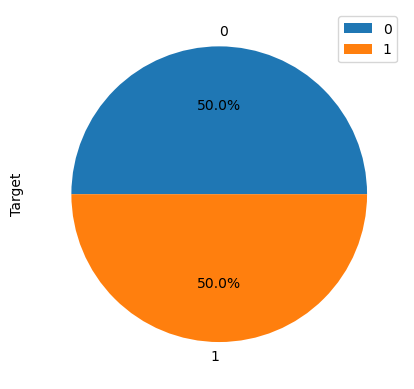

<Figure size 640x480 with 0 Axes>

In [73]:
plt.style.use('default')
pie_MS_M=pd.DataFrame(df['Target'].value_counts())
pie_MS_M.plot.pie(subplots=True,labels=pie_MS_M.index.values,autopct='%1.1f%%')
plt.show()
plt.savefig("pie_chart.jpg")

- from the above pie chart, we notice that both categories 'no' and 'yes' are equally present in the dataset.

In [74]:
df.describe()

,job,marital,education,default,housing,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Target
count,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000
mean,0.348508,0.403828,0.557450,0.078302,0.543199,0.279596,0.077419,0.023944,0.888058,0.044064,0.495153,0.604805,0.498305,0.445022,0.527626,0.648990,0.500000
std,0.327259,0.200437,0.302072,0.181171,0.492589,0.448771,0.066691,0.041228,0.314210,0.096189,0.233321,0.359252,0.246238,0.223068,0.428889,0.328931,0.500003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000931,0.333333,0.285714,0.000000,0.000000,0.000000,0.030546,0.000000,1.000000,0.000000,0.500000,0.333333,0.285097,0.338912,0.138291,0.425709,0.000000
50%,0.272727,0.333333,0.571429,0.000000,1.000000,0.000000,0.055917,0.017186,1.000000,0.000000,0.500000,0.687500,0.484412,0.376569,0.767853,0.859735,0.500000
75%,0.636364,0.666667,0.857143,0.000000,1.000000,1.000000,0.106651,0.034528,1.000000,0.000000,0.500000,1.000000,0.698753,0.602510,0.980492,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73074 entries, 0 to 73073
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             73074 non-null  float64
 1   marital         73074 non-null  float64
 2   education       73074 non-null  float64
 3   default         73074 non-null  float64
 4   housing         73074 non-null  float64
 5   contact         73074 non-null  float64
 6   duration        73074 non-null  float64
 7   campaign        73074 non-null  float64
 8   pdays           73074 non-null  float64
 9   previous        73074 non-null  float64
 10  poutcome        73074 non-null  float64
 11  emp.var.rate    73074 non-null  float64
 12  cons.price.idx  73074 non-null  float64
 13  cons.conf.idx   73074 non-null  float64
 14  euribor3m       73074 non-null  float64
 15  nr.employed     73074 non-null  float64
 16  Target          73074 non-null  int64  
dtypes: float64(16), int64(1)
memory

### Splitting the data after oversampling


In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=12)

In [77]:
Y_train=Y_train.values.ravel()
Y_test=Y_test.values.ravel()

### Bagging Classifier after Oversampling


In [79]:
bag_model = BaggingClassifier(base_estimator=BaggingClassifier(max_samples=0.570, max_features=0.99),n_estimators=10,random_state=42)
bag_model.fit(X_train, Y_train)
bag_pred = bag_model.predict(X_test)
pred_labels = np.rint(bag_pred)
bag_model_acc = accuracy_score(Y_test, pred_labels)

Confusion matrix, without normalization
[[6630  634]
 [ 271 7080]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      7264
           1       0.92      0.96      0.94      7351

    accuracy                           0.94     14615
   macro avg       0.94      0.94      0.94     14615
weighted avg       0.94      0.94      0.94     14615



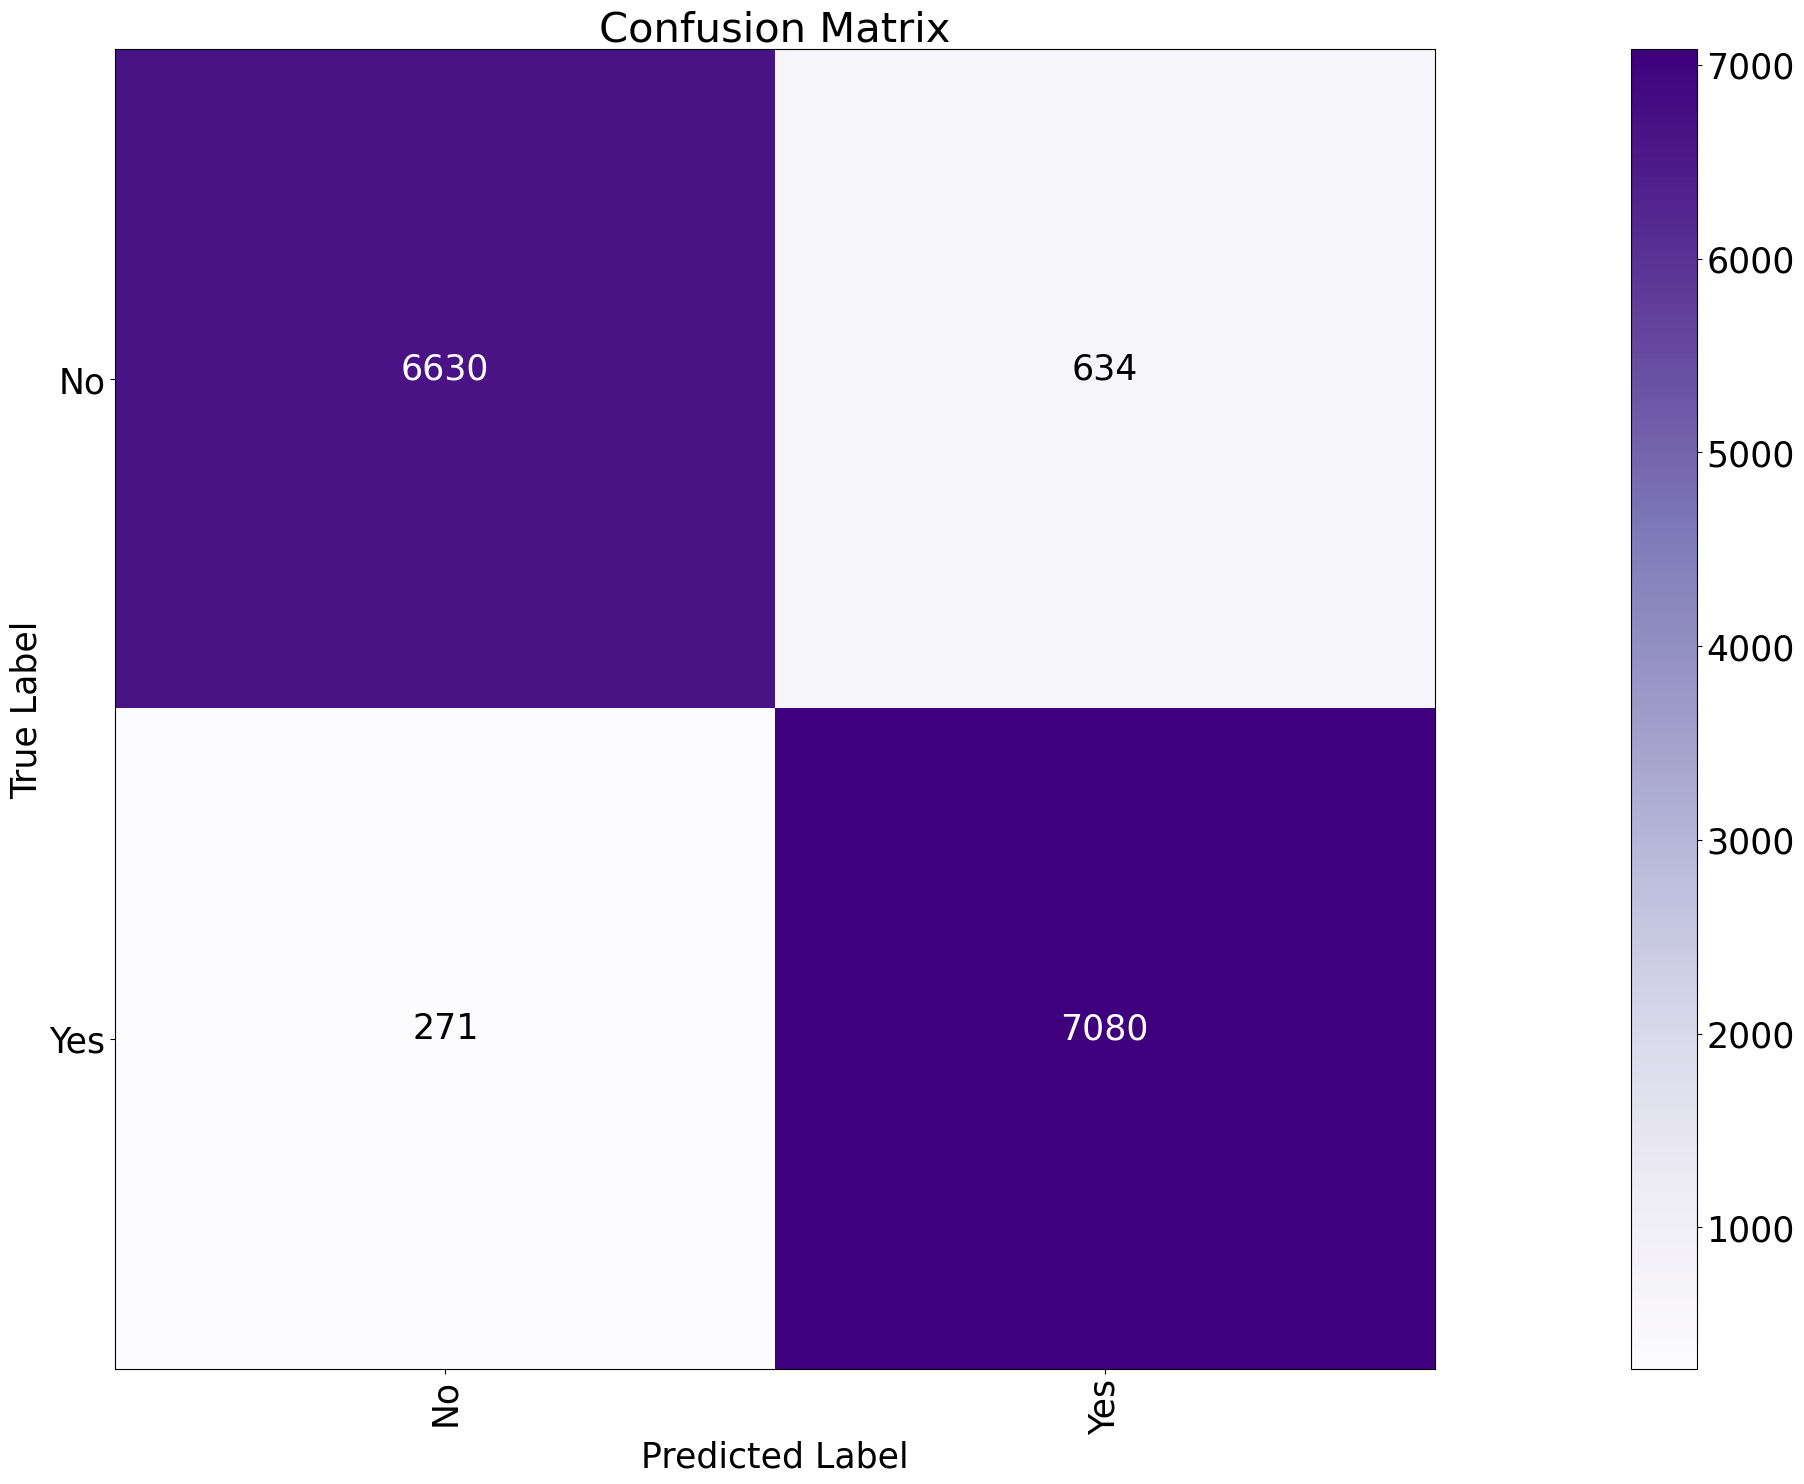

In [80]:
conf_matrix =confusion_matrix(Y_test,pred_labels)
cm_plot_labels=['No','Yes']
plot_confusion_matrix(conf_matrix,cm_plot_labels,title="Confusion Matrix")
print(classification_report(Y_test,pred_labels))

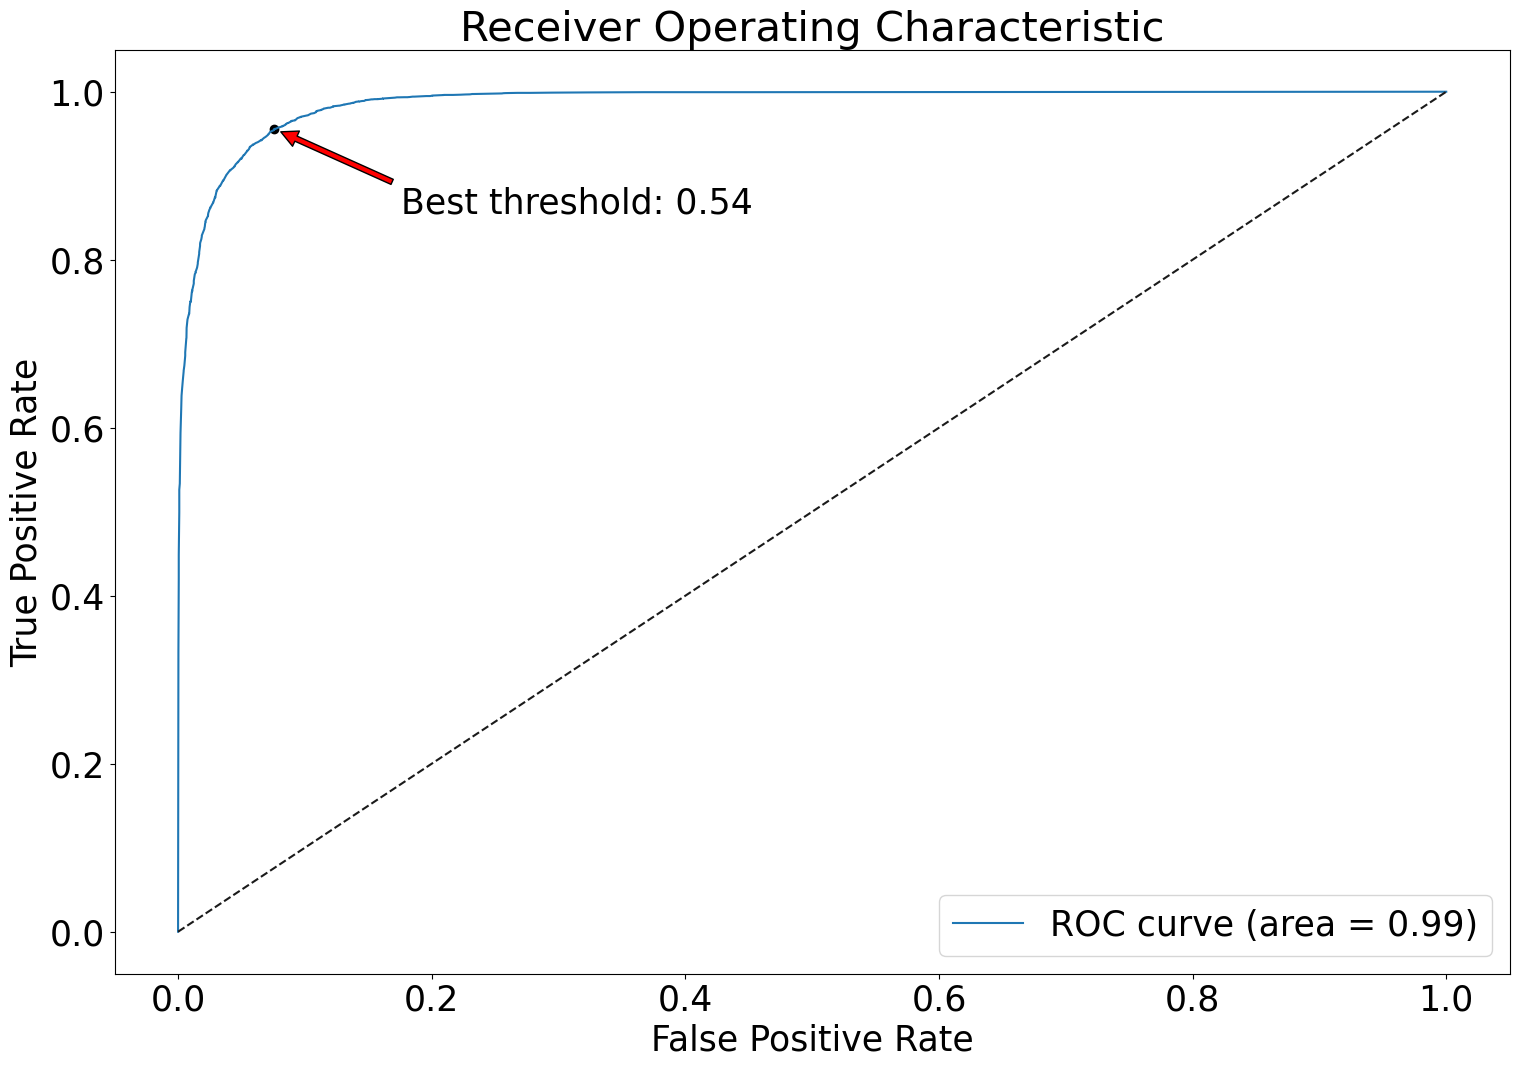

In [81]:
probs = bag_model.predict_proba(X_test)[:, 1]
ROC_CURVE(Y_test,probs)

### AdaBoost Classifier after oversampling

In [82]:
ada_model = AdaBoostClassifier(n_estimators=70,learning_rate=0.97, random_state=42)
ada_model.fit(X_train, Y_train)
ada_pred = ada_model.predict(X_test)
pred_labels = np.rint(ada_pred)

Confusion matrix, without normalization
[[6569  695]
 [ 649 6702]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7264
           1       0.91      0.91      0.91      7351

    accuracy                           0.91     14615
   macro avg       0.91      0.91      0.91     14615
weighted avg       0.91      0.91      0.91     14615



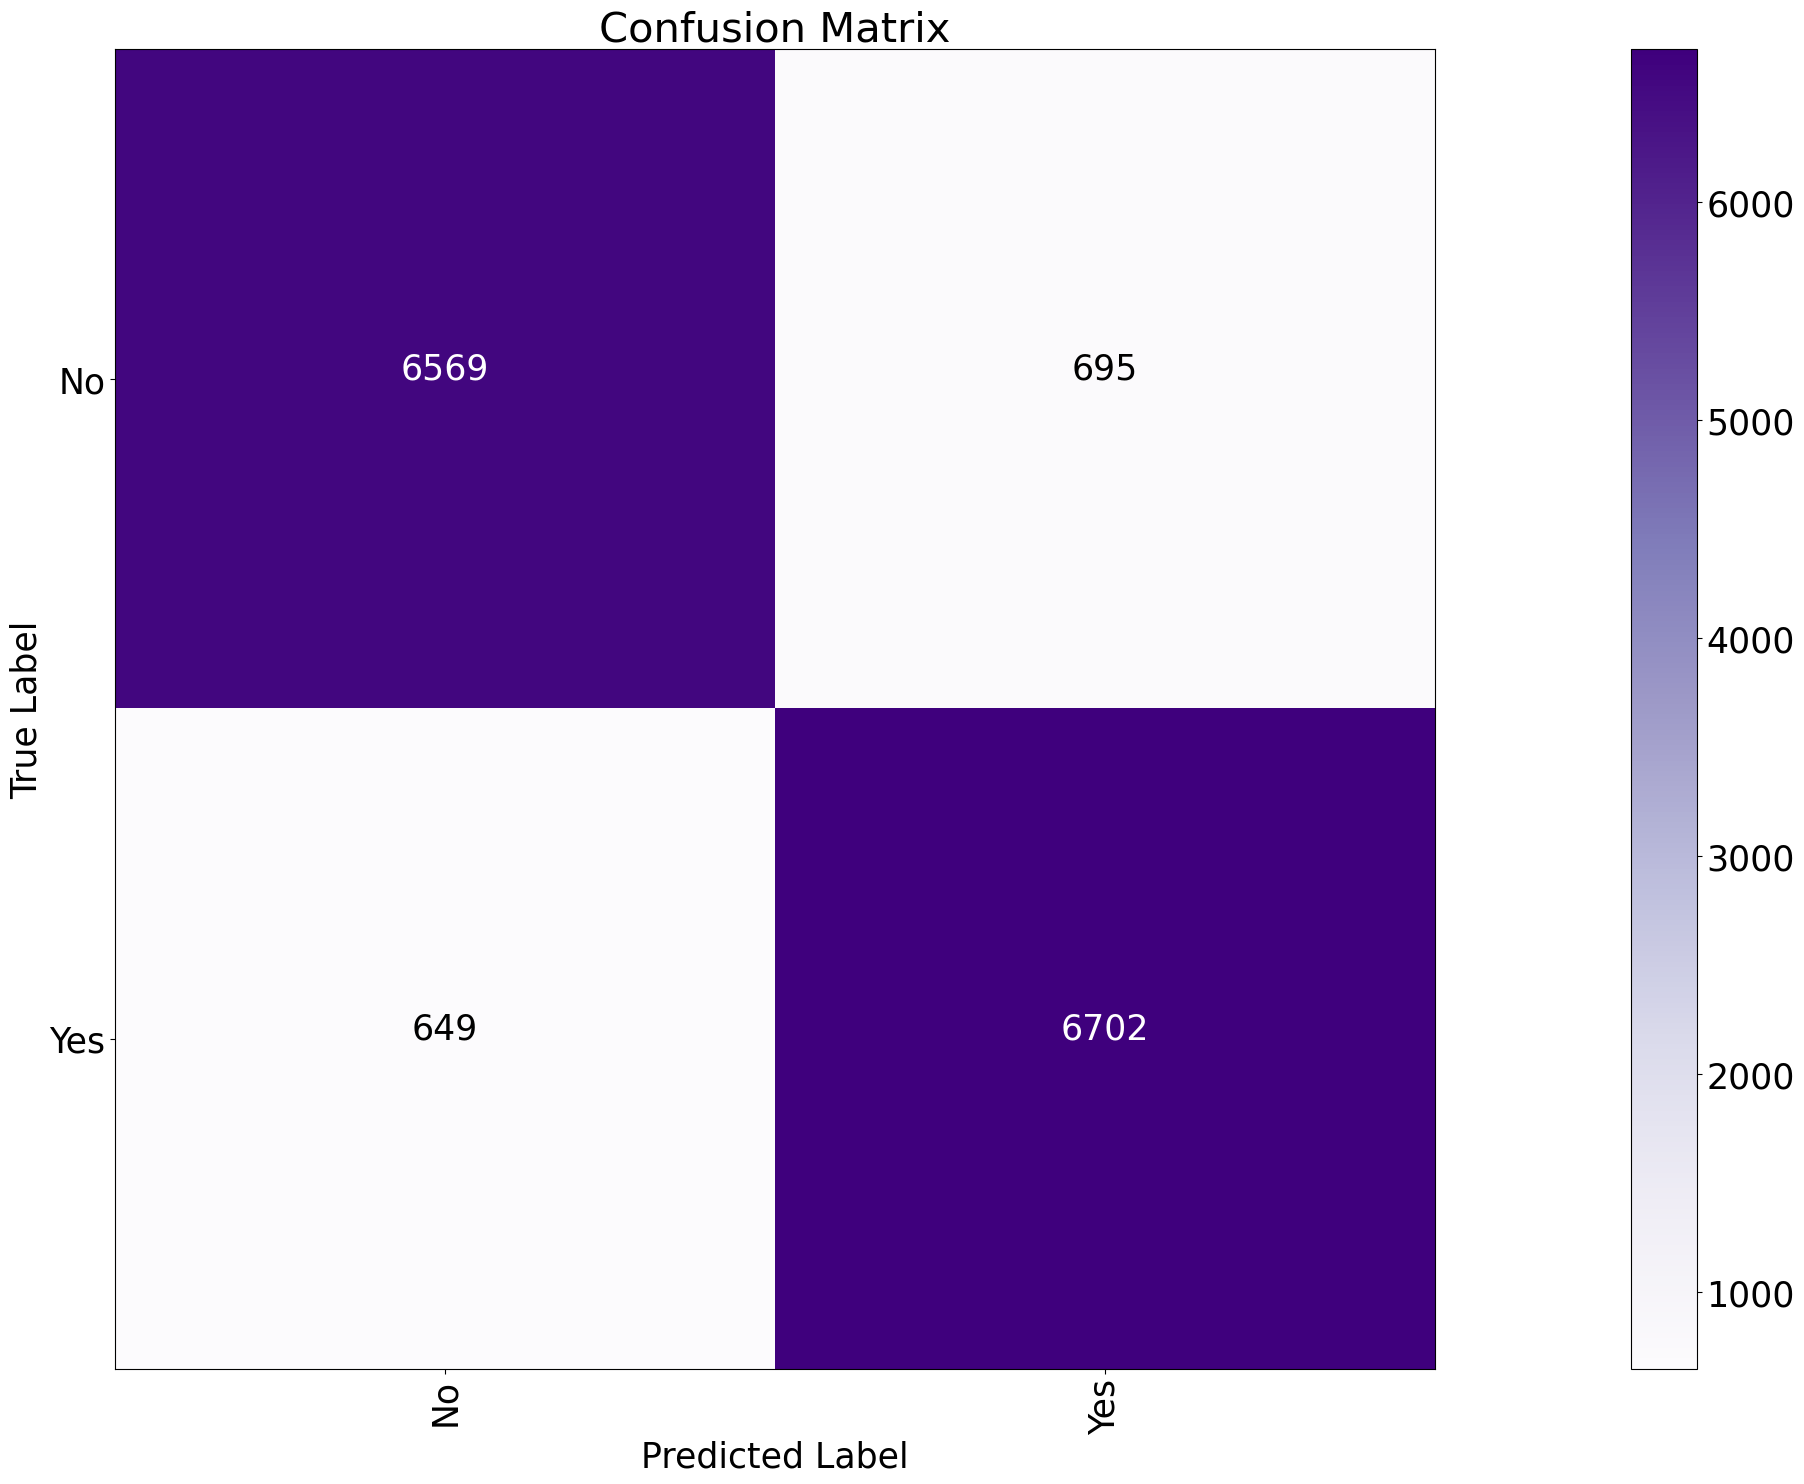

In [83]:
conf_matrix=confusion_matrix(Y_test,pred_labels)
cm_plot_labels=['No','Yes']
plot_confusion_matrix(conf_matrix,cm_plot_labels,title="Confusion Matrix")
print(classification_report(Y_test,pred_labels))

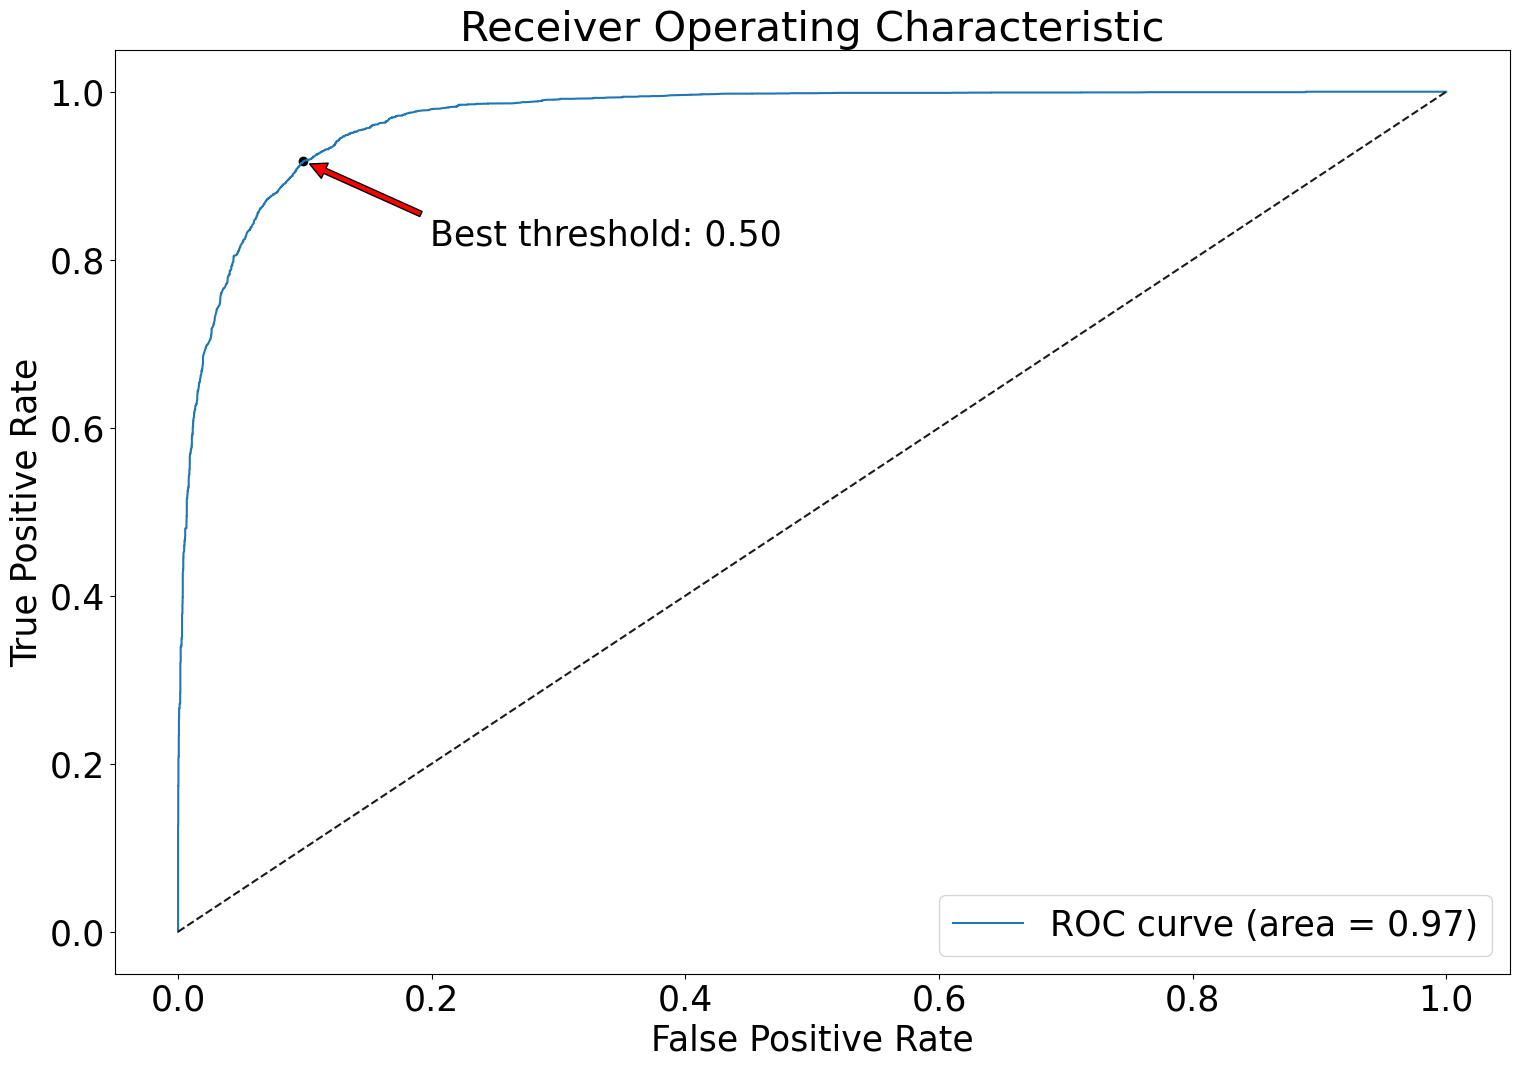

In [84]:
probs = ada_model.predict_proba(X_test)[:, 1]
ROC_CURVE(Y_test,probs)

### Gradient Boosting Classifier after oversampling

In [85]:
gb_model = GradientBoostingClassifier(n_estimators=54,learning_rate=0.35,min_samples_split=9,min_samples_leaf=5,random_state=42)
gb_model.fit(X_train, Y_train)
gb_pred = gb_model.predict(X_test)
pred_labels = np.rint(gb_pred)

Confusion matrix, without normalization
[[6575  689]
 [ 330 7021]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7264
           1       0.91      0.96      0.93      7351

    accuracy                           0.93     14615
   macro avg       0.93      0.93      0.93     14615
weighted avg       0.93      0.93      0.93     14615



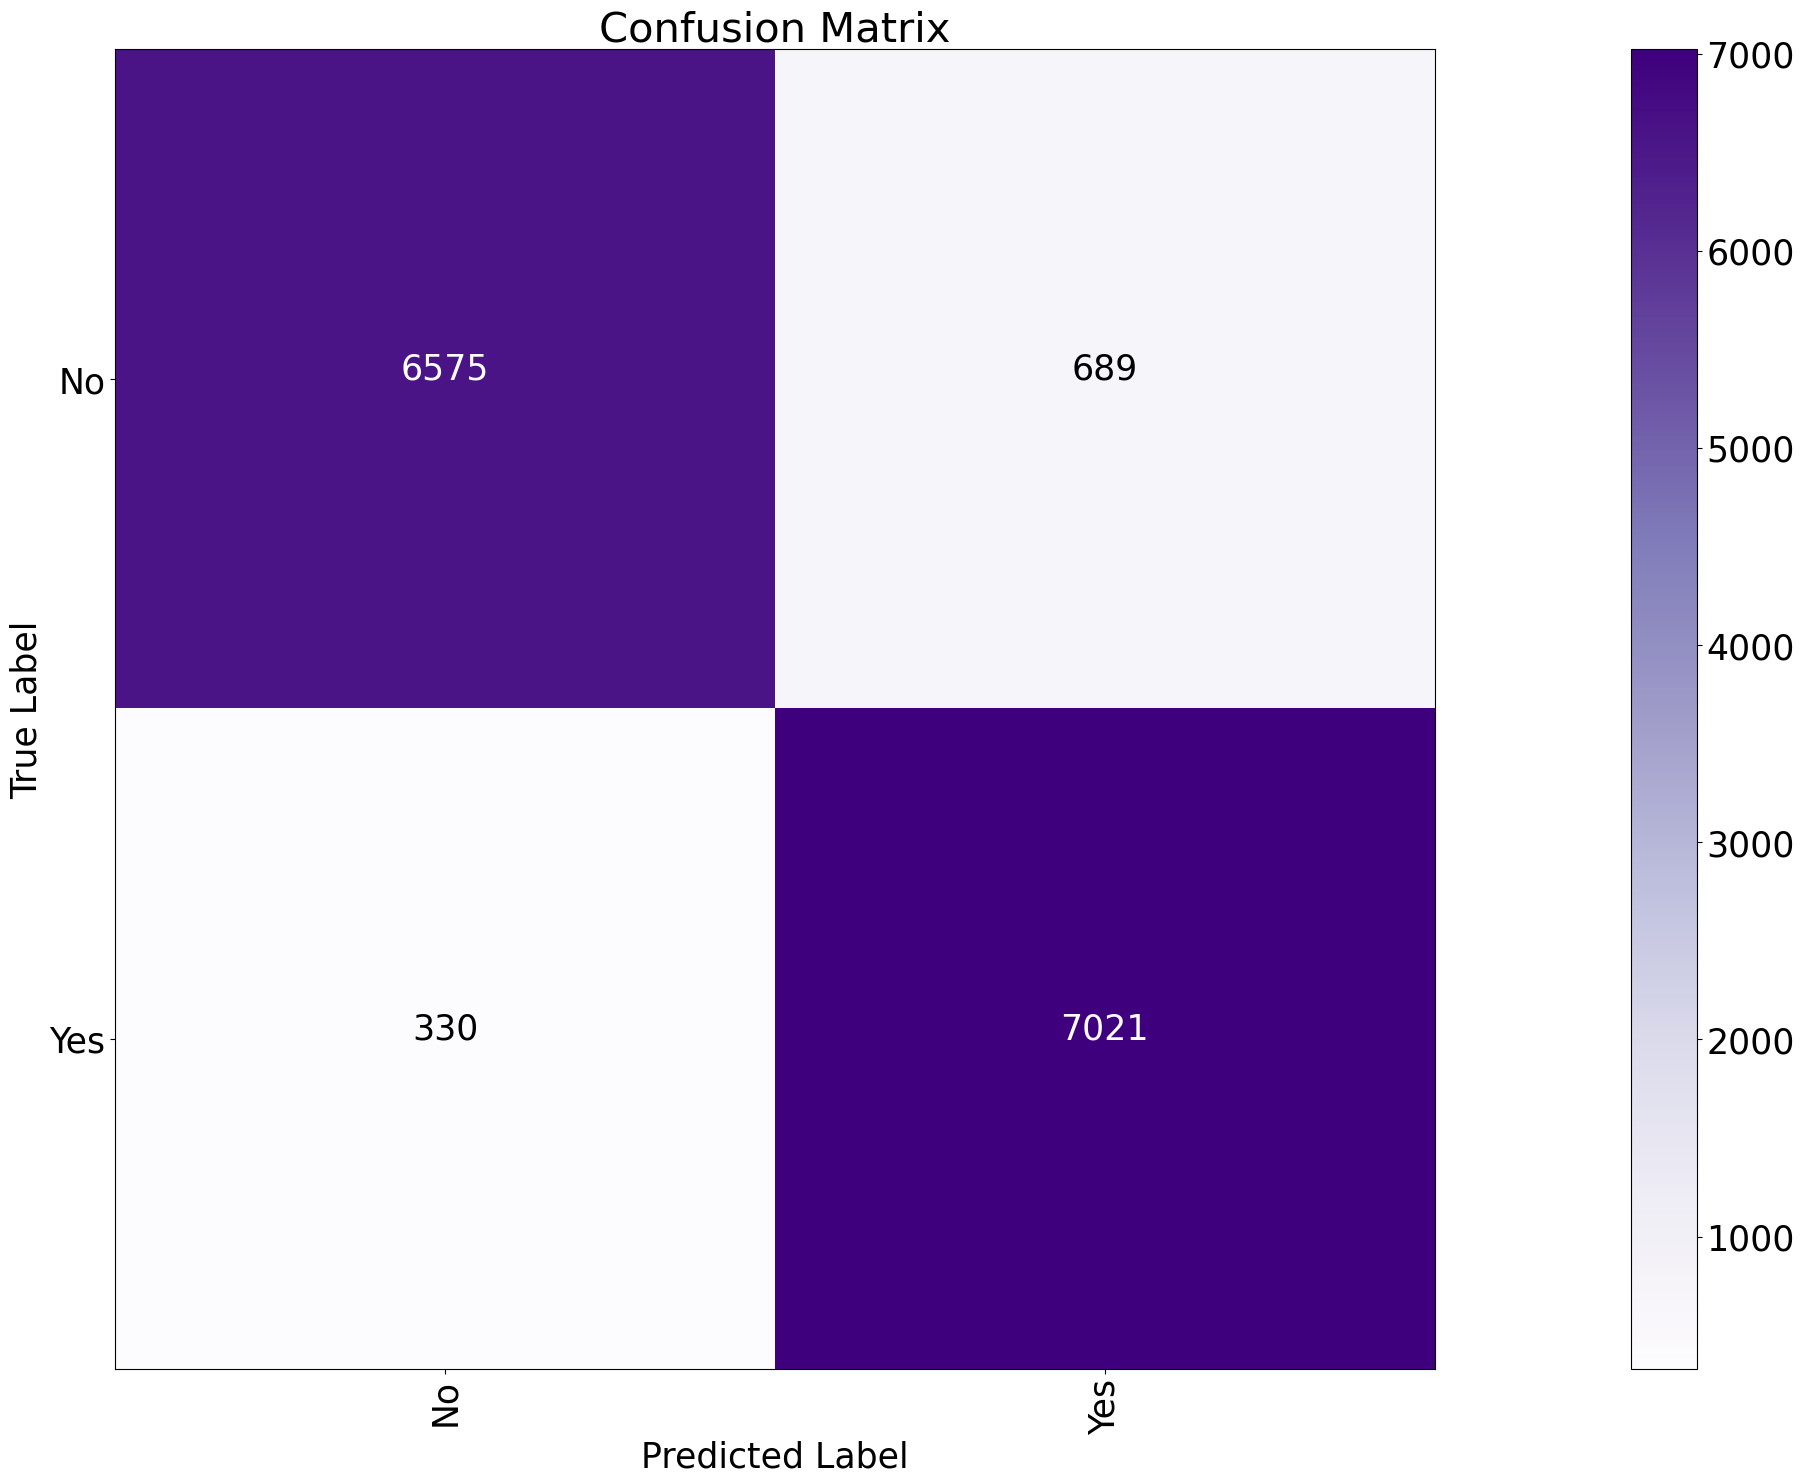

In [86]:
conf_matrix=confusion_matrix(Y_test,pred_labels)
cm_plot_labels=['No','Yes']
plot_confusion_matrix(conf_matrix,cm_plot_labels,title="Confusion Matrix")
print(classification_report(Y_test,pred_labels))

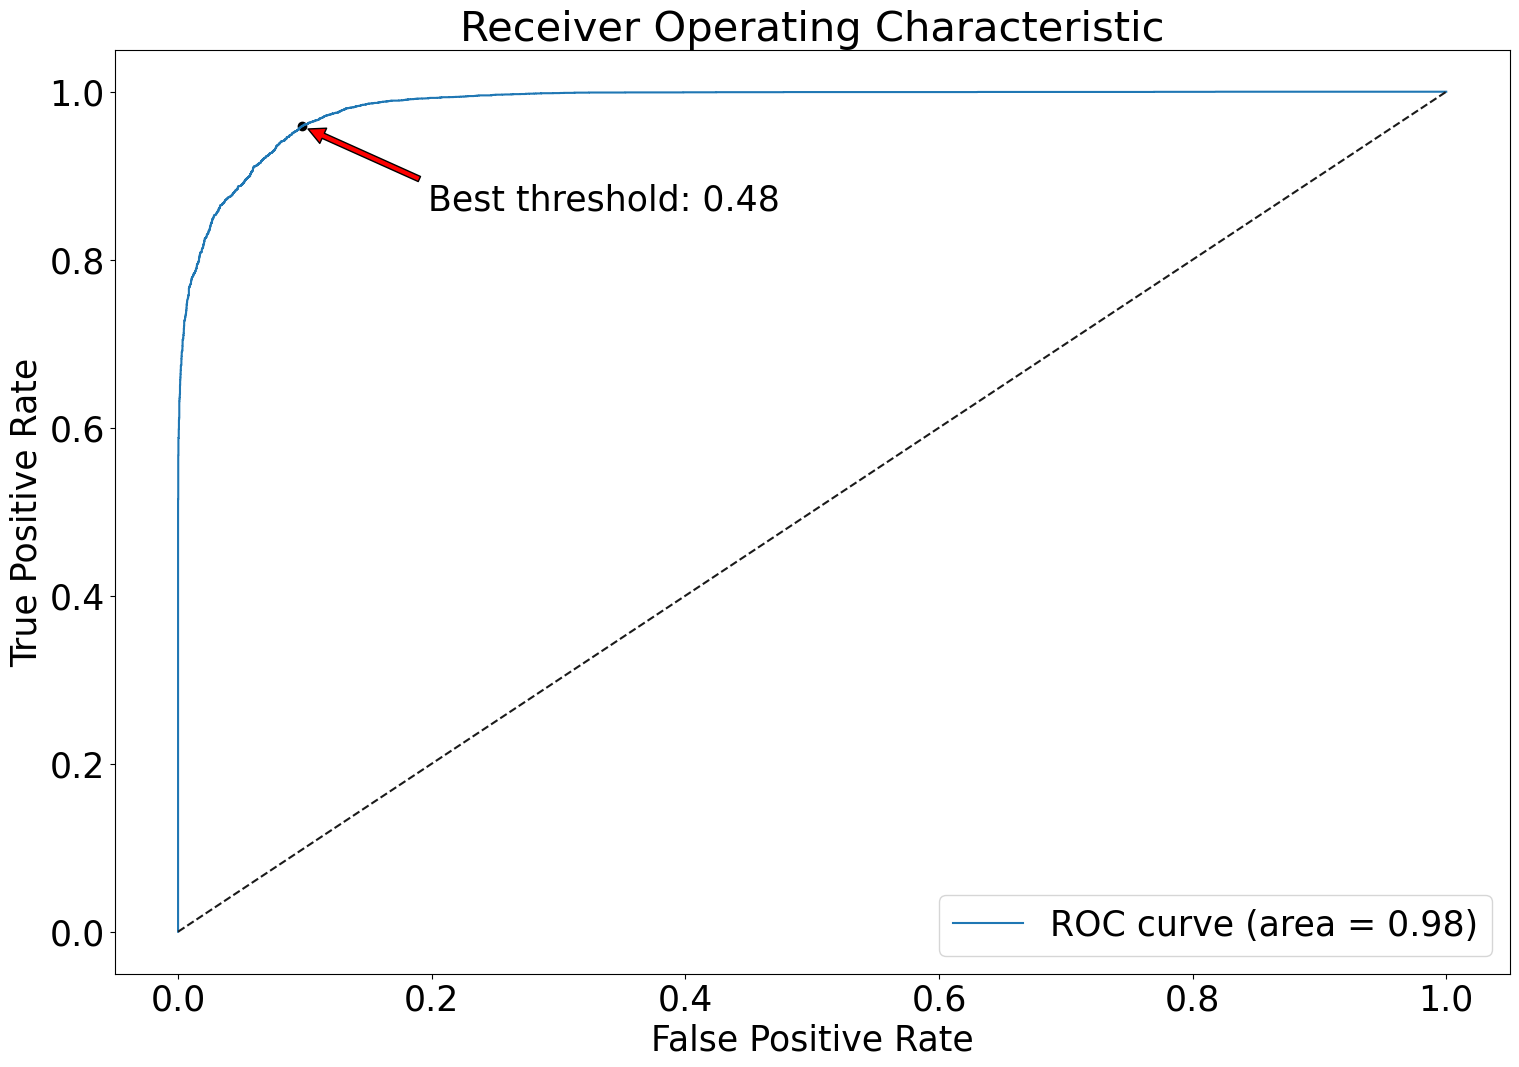

In [87]:
probs = gb_model.predict_proba(X_test)[:, 1]
ROC_CURVE(Y_test,probs)

### Random Forest Classifier after oversampling

In [88]:
rf_model = RandomForestClassifier(n_estimators=97,max_depth=12)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
pred_labels = np.rint(rf_pred)
rf_accuracy = accuracy_score(Y_test, pred_labels)

Confusion matrix, without normalization
[[6464  800]
 [ 234 7117]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7264
           1       0.90      0.97      0.93      7351

    accuracy                           0.93     14615
   macro avg       0.93      0.93      0.93     14615
weighted avg       0.93      0.93      0.93     14615



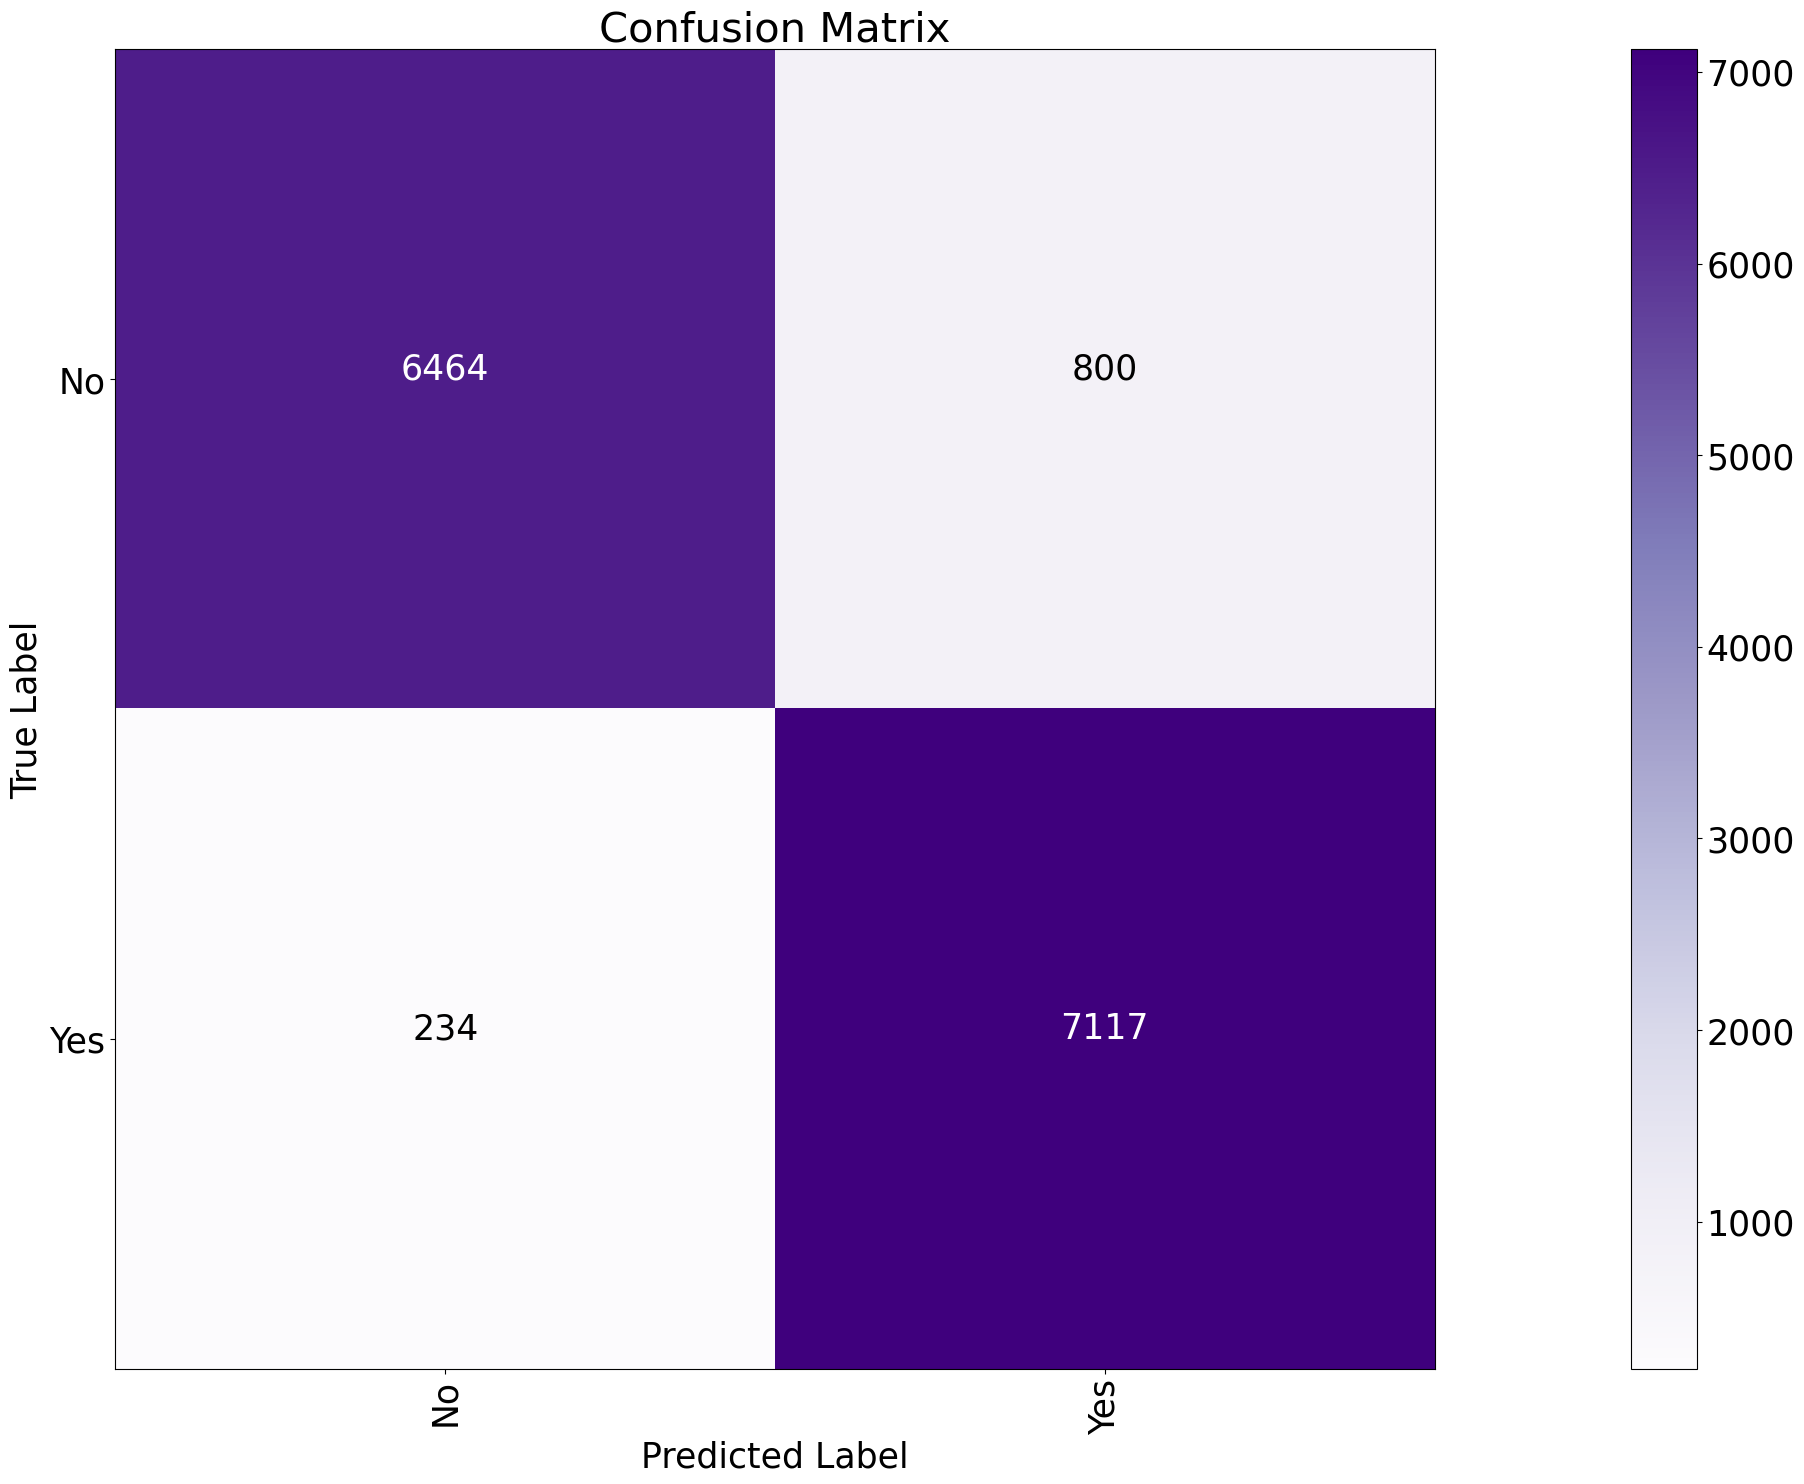

In [89]:
conf_matrix=confusion_matrix(Y_test,pred_labels)
cm_plot_labels=['No','Yes']
plot_confusion_matrix(conf_matrix,cm_plot_labels,title="Confusion Matrix")
print(classification_report(Y_test,pred_labels))

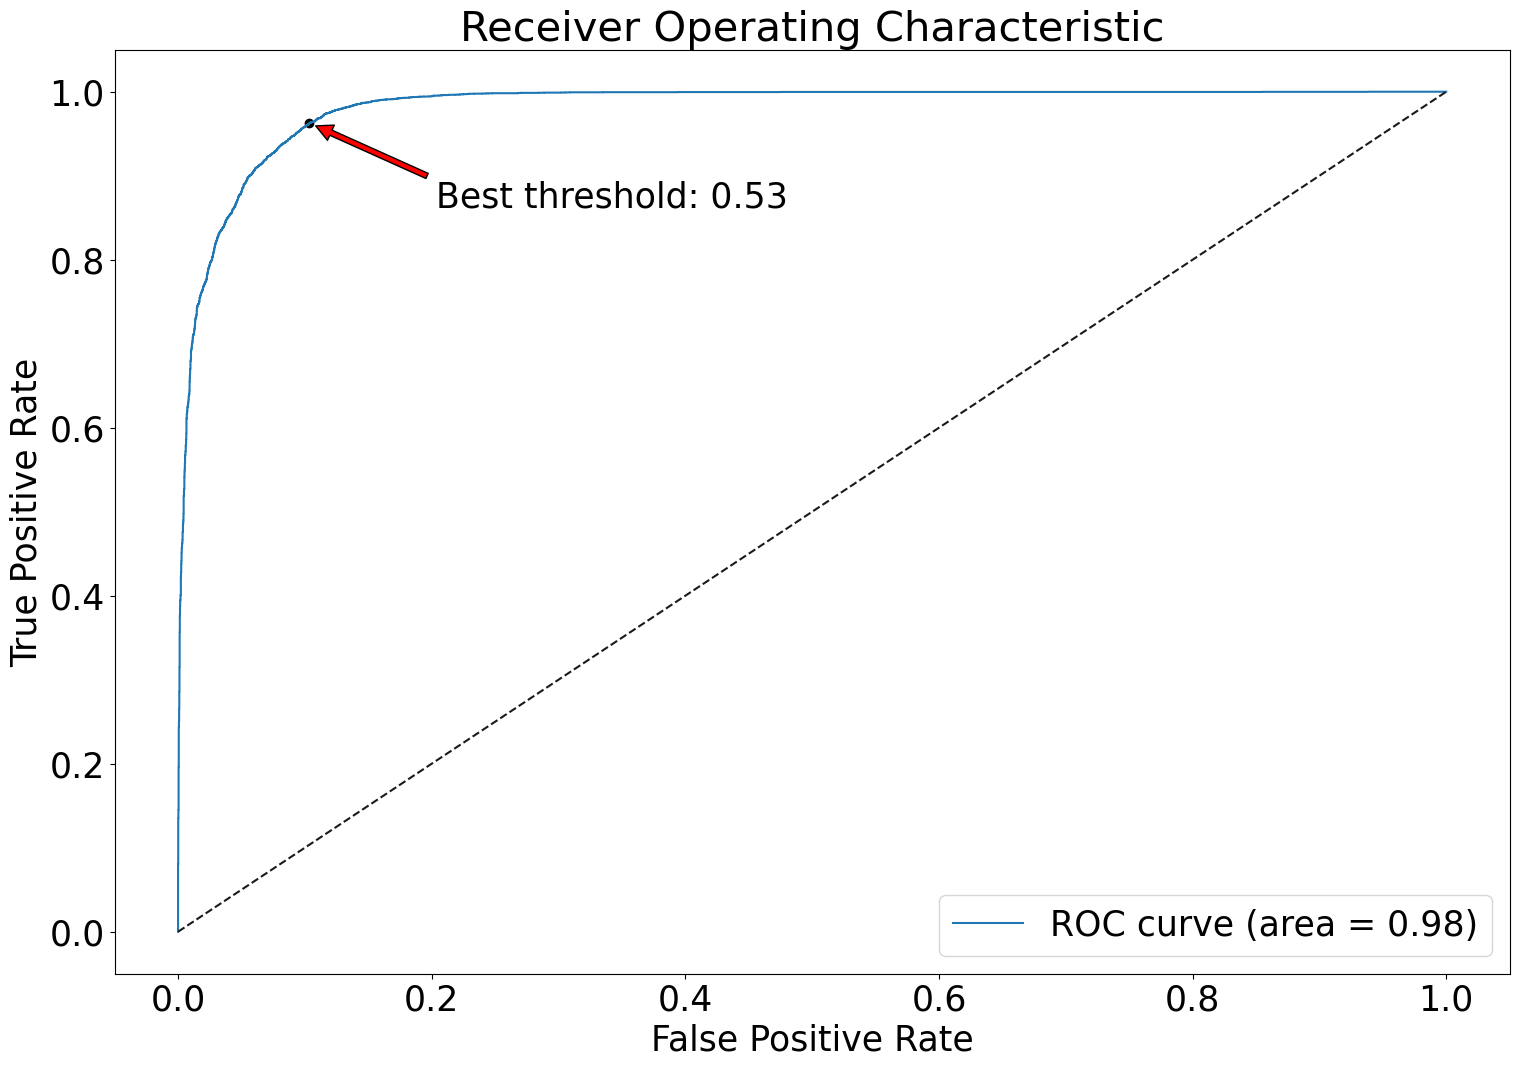

In [90]:
probs = rf_model.predict_proba(X_test)[:, 1]
ROC_CURVE(Y_test,probs)

In [91]:
Y=Y.values.ravel()

### Cross validation for Logistic Regression

In [92]:
cross_val_lr = LogisticRegression(max_iter=152)
scores_lr = cross_val_score(cross_val_lr, X, Y, cv=3)

print("Logistic regression cross-validation scores:", scores_lr)
print("Logistic regression average accuracy:", scores_lr.mean())

Logistic regression cross-validation scores: [0.85840381 0.89013876 0.52668528]
Logistic regression average accuracy: 0.7584092837397707


In [93]:
cross_val_lr = LogisticRegression(max_iter=152)
scores_lr = cross_val_score(cross_val_lr, X, Y, cv=5)

print("Logistic regression cross-validation scores:", scores_lr)
print("Logistic regression average accuracy:", scores_lr.mean())

Logistic regression cross-validation scores: [0.87711256 0.90222374 0.90523435 0.84563804 0.65026687]
Logistic regression average accuracy: 0.8360951114179596


In [94]:
cross_val_lr = LogisticRegression(max_iter=152)
scores_lr = cross_val_score(cross_val_lr, X, Y, cv=10)

print("Logistic regression cross-validation scores:", scores_lr)
print("Logistic regression average accuracy:", scores_lr.mean())

Logistic regression cross-validation scores: [0.86439518 0.92118227 0.90900383 0.90859332 0.89913781 0.91939236
 0.89366361 0.80238128 0.79170658 0.54742028]
Logistic regression average accuracy: 0.8456876532831098


### Cross validation for Decision Tree Classifier

In [95]:
cross_val_dt = DecisionTreeClassifier(criterion ='entropy',max_depth= 7,min_samples_split=3,min_samples_leaf=7)
scores_dt = cross_val_score(cross_val_dt, X, Y, cv=3)

print("Decision tree cross-validation scores:", scores_dt)
print("Decision tree average accuracy:", scores_dt.mean())

Decision tree cross-validation scores: [0.72234995 0.70042696 0.50804664]
Decision tree average accuracy: 0.643607849577141


In [96]:
cross_val_dt = DecisionTreeClassifier(criterion ='entropy',max_depth= 7,min_samples_split=,min_samples_leaf=7 )
scores_dt = cross_val_score(cross_val_dt, X, Y, cv=5)

print("Decision tree cross-validation scores:", scores_dt)
print("Decision tree average accuracy:", scores_dt.mean())

Decision tree cross-validation scores: [0.73198768 0.90975026 0.91255559 0.56038317 0.49781032]
Decision tree average accuracy: 0.7224974041781577


In [99]:
cross_val_dt = DecisionTreeClassifier(criterion ='entropy',max_depth= 7,min_samples_split=3,min_samples_leaf=7 )
scores_dt = cross_val_score(cross_val_dt, X, Y, cv=10)

print("Decision tree cross-validation scores:", scores_dt)
print("Decision tree average accuracy:", scores_dt.mean())

Decision tree cross-validation scores: [0.87465791 0.92474001 0.93678161 0.92008758 0.91747639 0.91172848
 0.67647461 0.58505543 0.73860682 0.57205419]
Decision tree average accuracy: 0.8057663026261868
